Our main aim is to do Customer Segmentation by K-Means Clustering with the help of a transactional dataset between 2022 and 2023. We have also done Explotary Data Analysis (EDA) like descriptive statistics and visualization of dataset and Brand Recommendation Machine which will recommend top brand(s) if a customer search for an item name. 

Why K-means is a popular choice for Customer Segmentation:


Unsupervised Learning:
Unlike supervised learning, where models learn from labeled data (e.g., spam vs. non-spam), unsupervised learning identifies patterns in data without labeled examples.
In customer segmentation, we often lack labeled data, making unsupervised methods like K-means valuable.

Customer Segmentation:
K-means is ideal for creating clearly defined customer segments based on various features.
These features might include recency, frequency, monetary value, or product preferences.
The model assigns each customer to a cluster, allowing personalized marketing and service strategies.

How K-means Works:
The “k” in K-means represents the number of clusters to create.
The algorithm starts by randomly placing “centroids” (initial cluster centers).
It then assigns each observation (customer) to the nearest centroid.
The centroids are updated by calculating the mean of observations within each cluster.
This process continues until further improvement is not possible (minimizing within-cluster sum of square distances).

K-means clustering allows businesses to create meaningful customer segments, tailor marketing efforts, and enhance customer experiences.

# Importing Necessary Libraries

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import linregress
from sklearn.ensemble import IsolationForest
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import matplotlib.gridspec as gridspec
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from collections import Counter
import plotly.graph_objects as go
from tabulate import tabulate


%matplotlib inline

# Loading the Dataset

In [2]:
df = pd.read_csv("online_shopping_dataset.csv")

# Initial Data Analysis

In [3]:
df.head()

UserID  Age  Gender   Location   Item Name          Brand   Price  Rating  \
0  User14   40  Female     Russia       Watch  Henry-Johnson  205.90     2.8   
1   User8   50    Male     Russia     T-Shirt  Lawson-Tucker  132.02     3.1   
2   User2   59    Male      India  Headphones      Gomez LLC  384.34     1.4   
3   User6   48  Female  Argentina     T-Shirt  Morris-Miller  341.77     3.0   
4   User5   49  Female  Singapore         Bag    Waters-Hall  309.58     3.6   

   Number of Reviews  Purchase History  Search History  Wishlist  Cart Items  \
0                624              True           False     False       False   
1                794             False           False     False        True   
2                619             False           False     False       False   
3                336              True            True      True       False   
4                973              True            True      True       False   

   Click History  Transaction No.     Transaction Date  
0          False                1  2023-07-08 00:00:00  
1           True                2  2023-03-14 00:00:00  
2          False                3  2022-10-17 00:00:00  
3           True                4  2022-04-02 00:00:00  
4          False                5  2022-01-29 00:00:00

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UserID             1000 non-null   object 
 1   Age                1000 non-null   int64  
 2   Gender             1000 non-null   object 
 3   Location           1000 non-null   object 
 4   Item Name          1000 non-null   object 
 5   Brand              1000 non-null   object 
 6   Price              1000 non-null   float64
 7   Rating             1000 non-null   float64
 8   Number of Reviews  1000 non-null   int64  
 9   Purchase History   1000 non-null   bool   
 10  Search History     1000 non-null   bool   
 11  Wishlist           1000 non-null   bool   
 12  Cart Items         1000 non-null   bool   
 13  Click History      1000 non-null   bool   
 14  Transaction No.    1000 non-null   int64  
 15  Transaction Date   1000 non-null   object 
dtypes: bool(5), float64(2), i

In [5]:
# Summary statistics for numerical variables
df.describe().T

count       mean         std    min      25%     50%  \
Age                1000.0   41.58200   13.829480  18.00   30.000   42.00   
Price              1000.0  254.49653  140.606560  10.16  138.135  248.07   
Rating             1000.0    2.98440    1.137132   1.00    2.000    2.90   
Number of Reviews  1000.0  480.55900  280.554782   1.00  242.500  465.00   
Transaction No.    1000.0  500.50000  288.819436   1.00  250.750  500.50   

                        75%      max  
Age                 54.0000    65.00  
Price              377.1825   499.91  
Rating               3.9000     5.00  
Number of Reviews  703.2500   998.00  
Transaction No.    750.2500  1000.00

In [6]:
# Summary statistics for categorical variables
df.describe(include='object').T

count unique                  top freq
UserID            1000     20                User8   63
Gender            1000      2                 Male  530
Location          1000     18               Greece   74
Item Name         1000     10              T-Shirt  124
Brand             1000    969            Smith Inc    3
Transaction Date  1000    548  2022-10-23 00:00:00    6

# Data Cleaning

In [7]:
df.isnull().sum()

UserID               0
Age                  0
Gender               0
Location             0
Item Name            0
Brand                0
Price                0
Rating               0
Number of Reviews    0
Purchase History     0
Search History       0
Wishlist             0
Cart Items           0
Click History        0
Transaction No.      0
Transaction Date     0
dtype: int64

No missing values in any columns

In [8]:
# Finding duplicate rows
duplicate_rows = df[df.duplicated(keep=False)]

# Displaying the duplicate rows
duplicate_rows.head()

Empty DataFrame
Columns: [UserID, Age, Gender, Location, Item Name, Brand, Price, Rating, Number of Reviews, Purchase History, Search History, Wishlist, Cart Items, Click History, Transaction No., Transaction Date]
Index: []

In [9]:
# Displaying the number of duplicate rows
print(f"The dataset contains {df.duplicated().sum()} duplicate rows that need to be removed.")

The dataset contains 0 duplicate rows that need to be removed.


In [10]:
df

UserID  Age  Gender   Location   Item Name                         Brand  \
0    User14   40  Female     Russia       Watch                 Henry-Johnson   
1     User8   50    Male     Russia     T-Shirt                 Lawson-Tucker   
2     User2   59    Male      India  Headphones                     Gomez LLC   
3     User6   48  Female  Argentina     T-Shirt                 Morris-Miller   
4     User5   49  Female  Singapore         Bag                   Waters-Hall   
..      ...  ...     ...        ...         ...                           ...   
995   User3   25    Male    Belgium       Watch  Jimenez, Noble and Nicholson   
996  User19   42    Male         UK       Shoes              Jenkins-Williams   
997   User7   42  Female  Singapore     T-Shirt   Leonard, Phillips and Scott   
998  User11   56    Male      Japan     Perfume                Coleman-Savage   
999   User1   52  Female      India         Bag               Wright-Richards   

      Price  Rating  Number of Reviews  Purchase History  Search History  \
0    205.90     2.8                624              True           False   
1    132.02     3.1                794             False           False   
2    384.34     1.4                619             False           False   
3    341.77     3.0                336              True            True   
4    309.58     3.6                973              True            True   
..      ...     ...                ...               ...             ...   
995  372.24     4.7                320             False            True   
996   27.06     4.1                239             False            True   
997  148.12     3.5                449             False           False   
998  481.67     3.6                419             False            True   
999  427.96     1.9                 25              True           False   

     Wishlist  Cart Items  Click History  Transaction No.     Transaction Date  
0       False       False          False                1  2023-07-08 00:00:00  
1       False        True           True                2  2023-03-14 00:00:00  
2       False       False          False                3  2022-10-17 00:00:00  
3        True       False           True                4  2022-04-02 00:00:00  
4        True       False          False                5  2022-01-29 00:00:00  
..        ...         ...            ...              ...                  ...  
995      True       False          False              996  2022-11-02 00:00:00  
996     False       False          False              997  2023-09-08 00:00:00  
997     False        True          False              998  2023-01-11 00:00:00  
998      True        True           True              999  2022-07-02 00:00:00  
999     False       False           True             1000  2023-01-20 00:00:00  

[1000 rows x 16 columns]

As in the above dataset we can see that there is a mistake, i.e. if the Purchase History is False then for what the transaction is doing and transaction no. is showing.

So I will now assign 0 to all Transaction No. which respective Purchase History is False

In [11]:
# Convert 'Purchase History' column to boolean values
df['Purchase History'] = df['Purchase History'].astype(bool)

# Count 'Transaction No.' as 0 if 'Purchase History' is False
df['Transaction No.'] = df.apply(lambda row: 0 if not row['Purchase History'] else row['Transaction No.'], axis=1)

In [12]:
df

UserID  Age  Gender   Location   Item Name                         Brand  \
0    User14   40  Female     Russia       Watch                 Henry-Johnson   
1     User8   50    Male     Russia     T-Shirt                 Lawson-Tucker   
2     User2   59    Male      India  Headphones                     Gomez LLC   
3     User6   48  Female  Argentina     T-Shirt                 Morris-Miller   
4     User5   49  Female  Singapore         Bag                   Waters-Hall   
..      ...  ...     ...        ...         ...                           ...   
995   User3   25    Male    Belgium       Watch  Jimenez, Noble and Nicholson   
996  User19   42    Male         UK       Shoes              Jenkins-Williams   
997   User7   42  Female  Singapore     T-Shirt   Leonard, Phillips and Scott   
998  User11   56    Male      Japan     Perfume                Coleman-Savage   
999   User1   52  Female      India         Bag               Wright-Richards   

      Price  Rating  Number of Reviews  Purchase History  Search History  \
0    205.90     2.8                624              True           False   
1    132.02     3.1                794             False           False   
2    384.34     1.4                619             False           False   
3    341.77     3.0                336              True            True   
4    309.58     3.6                973              True            True   
..      ...     ...                ...               ...             ...   
995  372.24     4.7                320             False            True   
996   27.06     4.1                239             False            True   
997  148.12     3.5                449             False           False   
998  481.67     3.6                419             False            True   
999  427.96     1.9                 25              True           False   

     Wishlist  Cart Items  Click History  Transaction No.     Transaction Date  
0       False       False          False                1  2023-07-08 00:00:00  
1       False        True           True                0  2023-03-14 00:00:00  
2       False       False          False                0  2022-10-17 00:00:00  
3        True       False           True                4  2022-04-02 00:00:00  
4        True       False          False                5  2022-01-29 00:00:00  
..        ...         ...            ...              ...                  ...  
995      True       False          False                0  2022-11-02 00:00:00  
996     False       False          False                0  2023-09-08 00:00:00  
997     False        True          False                0  2023-01-11 00:00:00  
998      True        True           True                0  2022-07-02 00:00:00  
999     False       False           True             1000  2023-01-20 00:00:00  

[1000 rows x 16 columns]

# Exploratory Data Analysis (EDA)

Descriptive Statistics

In [13]:
# Numerical columns
numerical_cols = ['Age', 'Price', 'Rating', 'Number of Reviews']
descriptive_stats_numerical = df[numerical_cols].describe()

In [14]:
descriptive_stats_numerical

Age       Price       Rating  Number of Reviews
count  1000.00000  1000.00000  1000.000000        1000.000000
mean     41.58200   254.49653     2.984400         480.559000
std      13.82948   140.60656     1.137132         280.554782
min      18.00000    10.16000     1.000000           1.000000
25%      30.00000   138.13500     2.000000         242.500000
50%      42.00000   248.07000     2.900000         465.000000
75%      54.00000   377.18250     3.900000         703.250000
max      65.00000   499.91000     5.000000         998.000000

Data Visualization

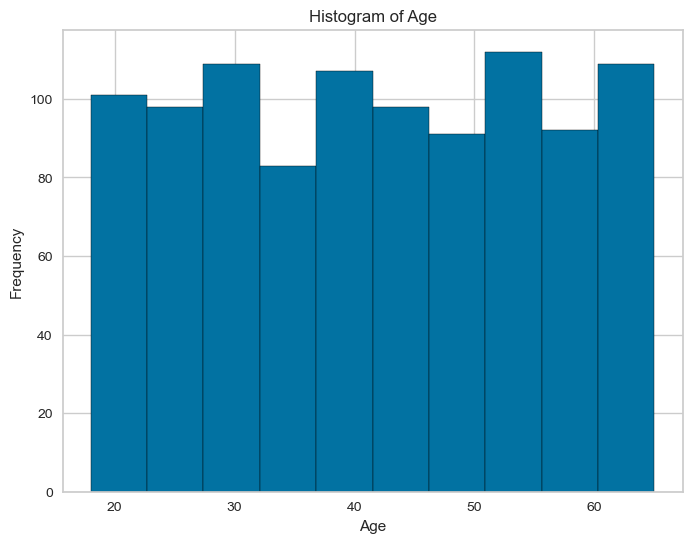

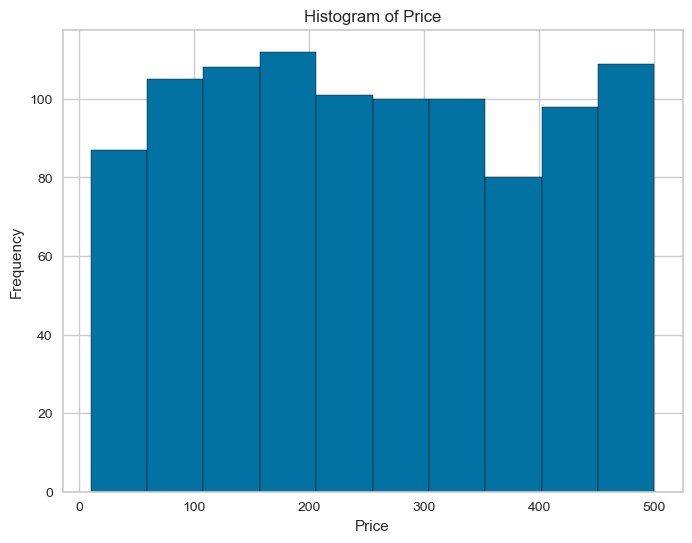

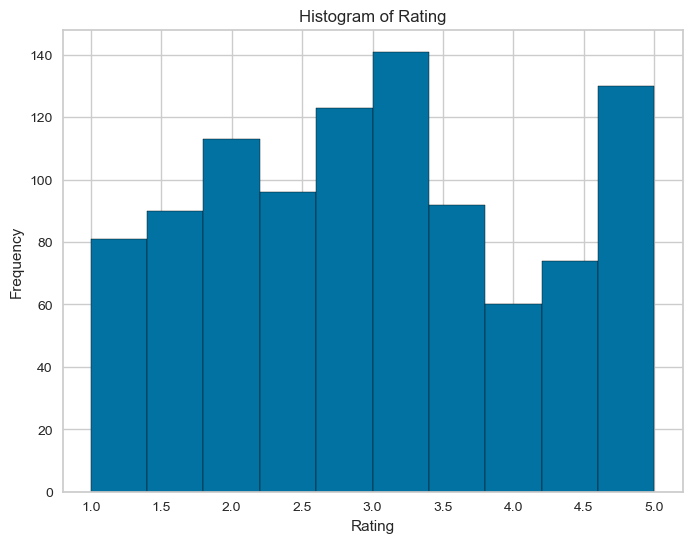

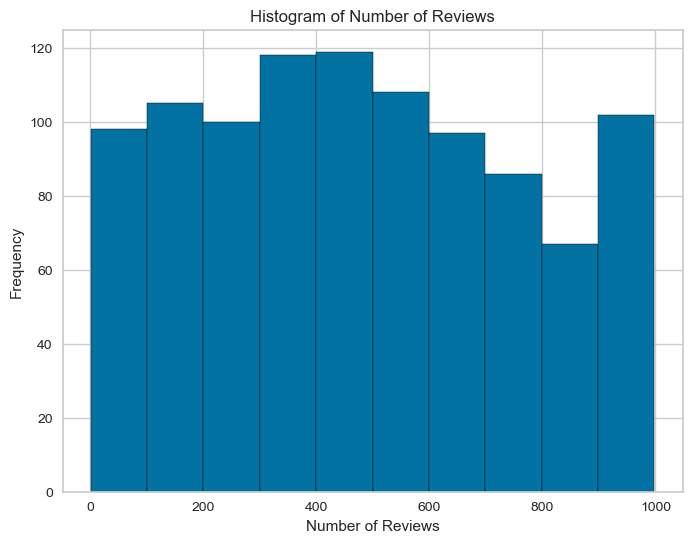

In [15]:
# Histograms for numerical variables
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    plt.hist(df[col], bins=10, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Bin width = (max value - min value) / number of bins

Bin width for Age = (65 - 18) / 10 = 4.7 (approximated to 5 for simplicity)

Bin 1: 18 - 22

Bin 2: 23 - 27

Bin 3: 28 - 32

Bin 4: 33 - 37

Bin 5: 38 - 42

Bin 6: 43 - 47

Bin 7: 48 - 52

Bin 8: 53 - 57

Bin 9: 58 - 62

Bin 10: 63 - 67

In [16]:
bin1 = df[df['Age'] <= 22]['UserID'].count()

print("Number of UserID with Age below or equal to 22:", bin1)

Number of UserID with Age below or equal to 22: 101


In [17]:
bin2 = df[(df['Age'] >= 23) & (df['Age'] <= 27)]['UserID'].count()

print("Number of UserID with Age more or equal to 23 to less or equal to 27:", bin2)

Number of UserID with Age more or equal to 23 to less or equal to 27: 98


Descriptive Statistics

In [18]:
# Categorical columns
categorical_cols = ['Gender', 'Location', 'Item Name', 'Brand', 'Purchase History', 'Search History', 'Wishlist', 'Cart Items', 'Click History']
descriptive_stats_categorical = df[categorical_cols].describe()

In [19]:
descriptive_stats_categorical

Gender Location Item Name      Brand Purchase History Search History  \
count    1000     1000      1000       1000             1000           1000   
unique      2       18        10        969                2              2   
top      Male   Greece   T-Shirt  Smith Inc            False           True   
freq      530       74       124          3              501            515   

       Wishlist Cart Items Click History  
count      1000       1000          1000  
unique        2          2             2  
top        True       True          True  
freq        506        522           514

In [20]:
# Count the frequency of unique values in categorical columns
frequency_categorical = {col: df[col].value_counts() for col in categorical_cols}

In [21]:
frequency_categorical

{'Gender': Male      530
 Female    470
 Name: Gender, dtype: int64,
 'Location': Greece         74
 Russia         71
 India          65
 New Zealand    62
 Japan          61
 USA            59
 Brazil         58
 UK             55
 Singapore      55
 France         54
 Argentina      53
 Belgium        52
 Switzerland    50
 Italy          49
 Australia      49
 Canada         46
 Spain          44
 UAE            43
 Name: Location, dtype: int64,
 'Item Name': T-Shirt       124
 Smartphone    115
 Shoes         109
 Headphones    104
 Laptop         99
 Bag            96
 Jeans          93
 Perfume        93
 Sunglasses     86
 Watch          81
 Name: Item Name, dtype: int64,
 'Brand': Smith Inc                         3
 Martin Group                      3
 Hernandez Ltd                     3
 Martin and Sons                   3
 Smith Group                       3
                                  ..
 Anderson, Mcpherson and Miller    1
 Johnson, Murphy and Ruiz          1
 Ryan,

Data Visualization

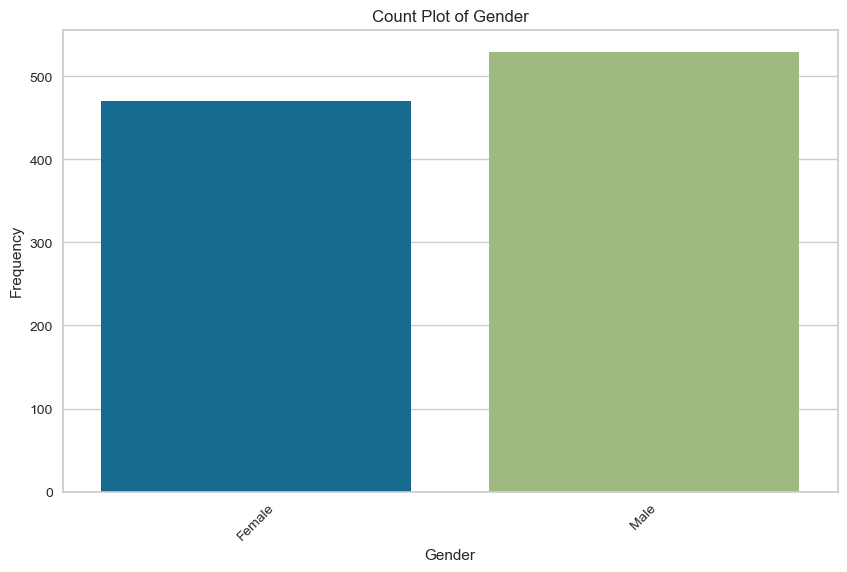

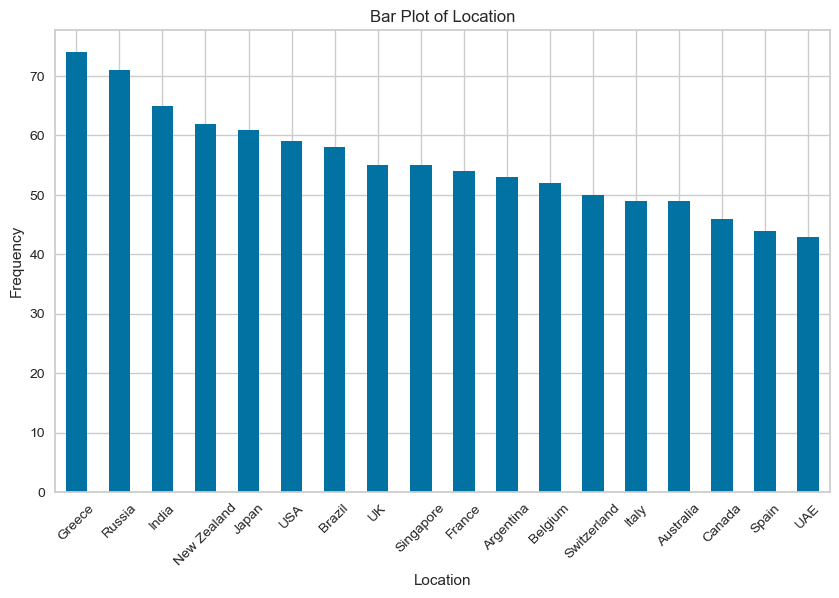

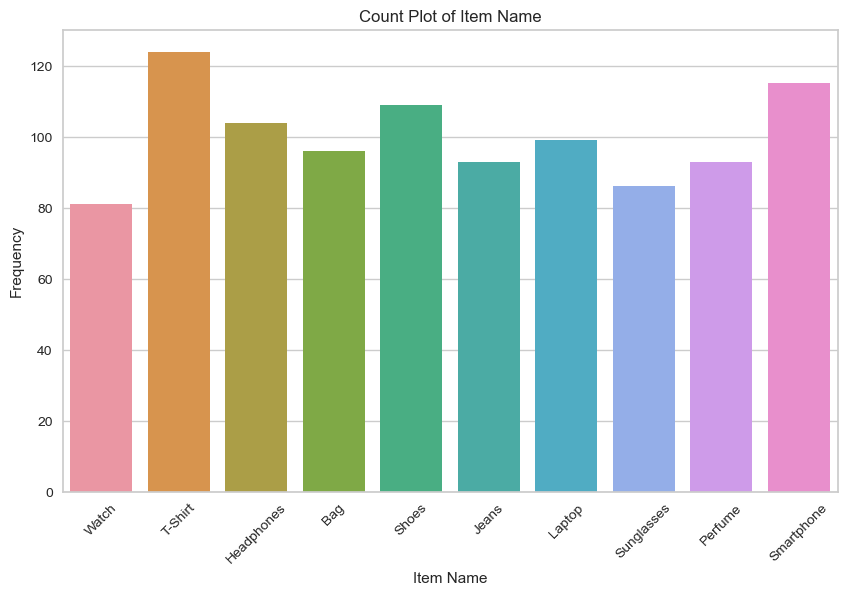

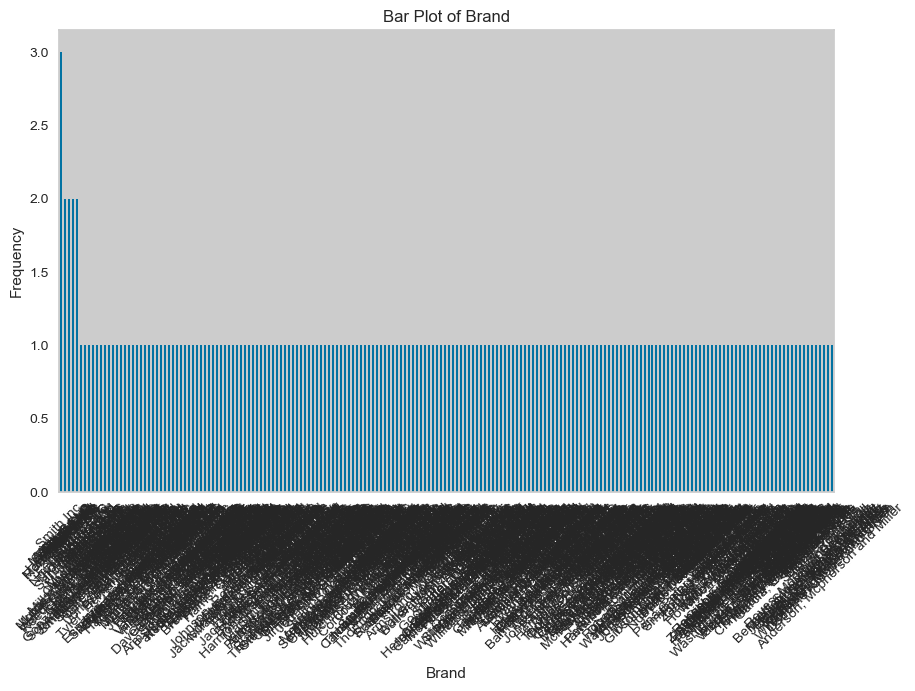

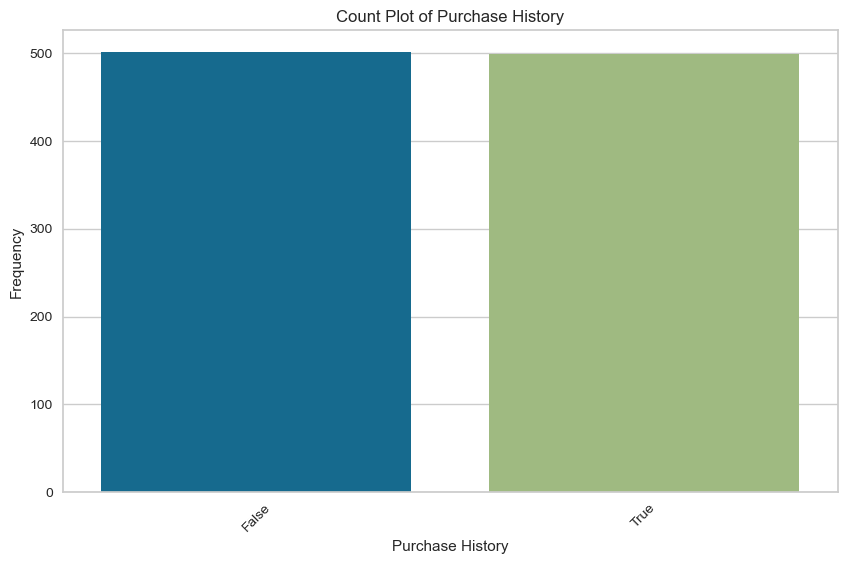

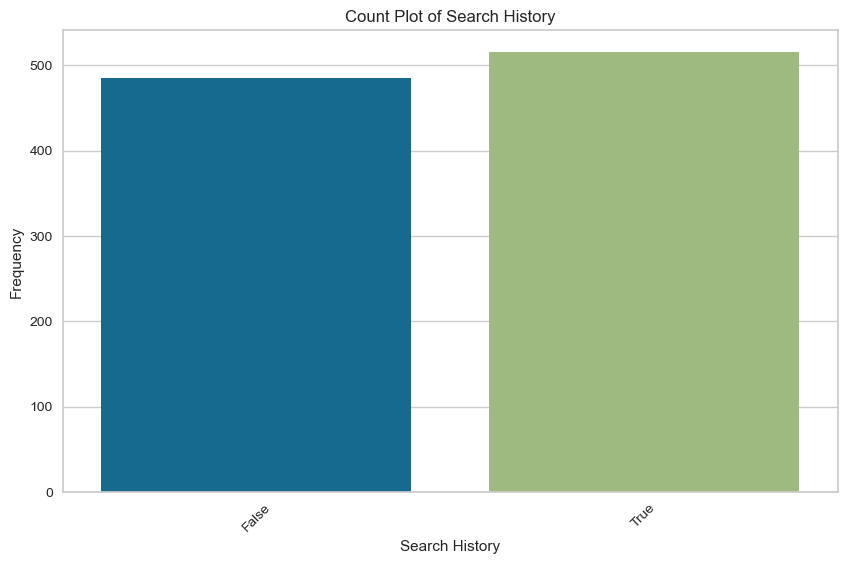

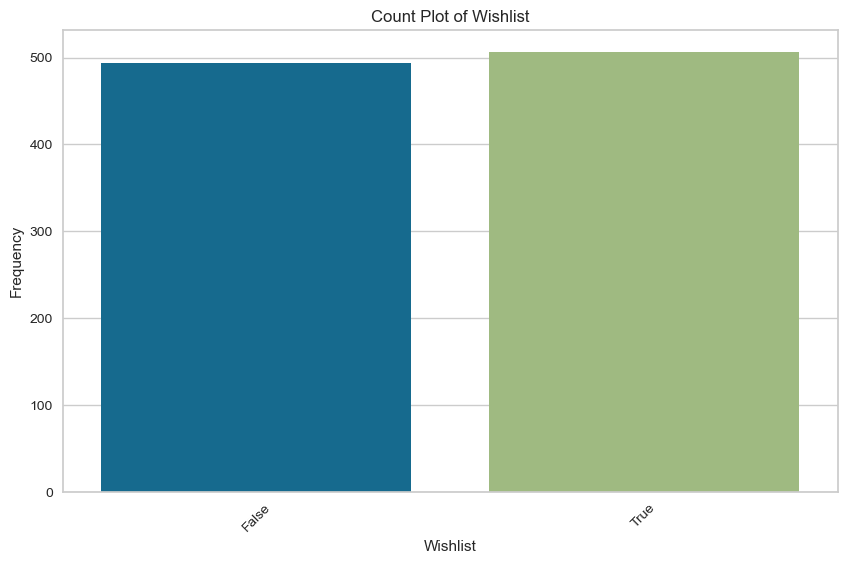

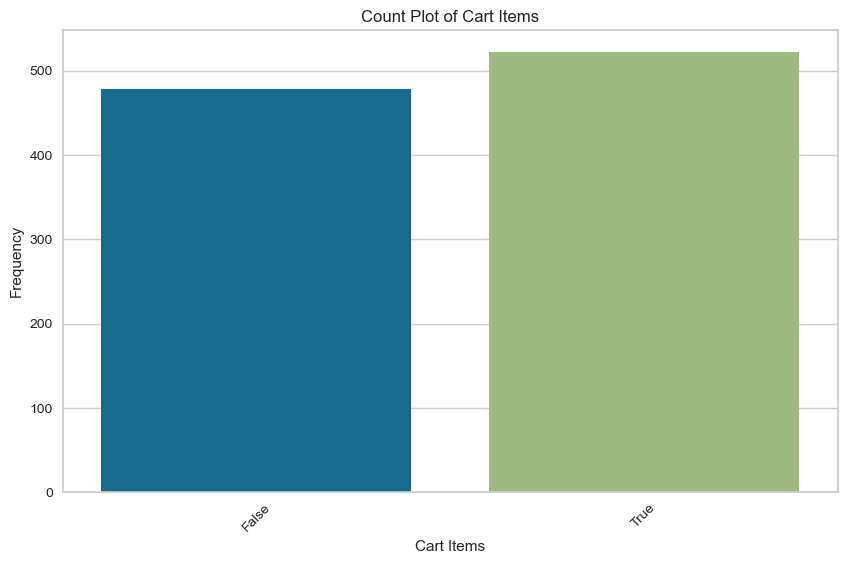

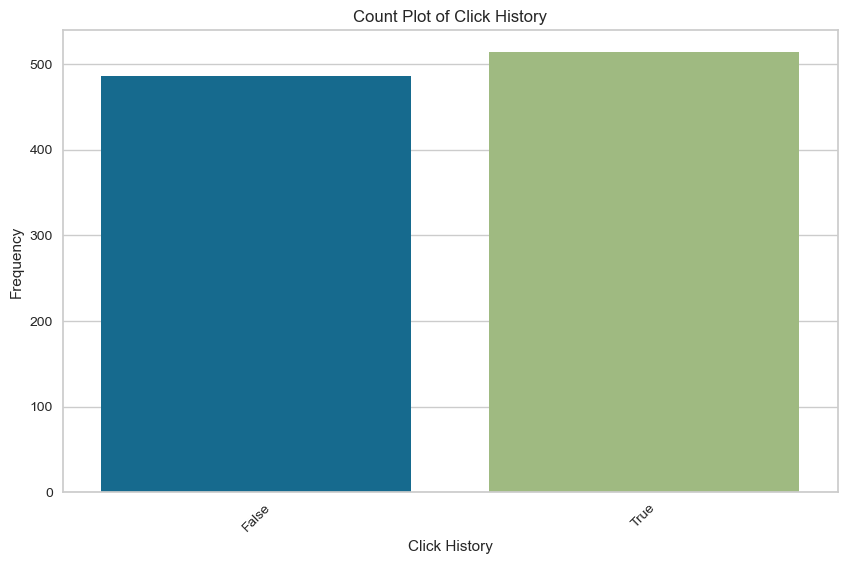

In [22]:
# Bar plots and count plots for categorical variables
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    if len(df[col].unique()) <= 10:  # For variables with fewer unique values, use countplot
        sns.countplot(data=df, x=col)
        plt.title(f'Count Plot of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)
    else:  # For variables with more than 10 unique values, use bar plot
        df[col].value_counts().plot(kind='bar')
        plt.title(f'Bar Plot of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)
    plt.show()

In [23]:
df

UserID  Age  Gender   Location   Item Name                         Brand  \
0    User14   40  Female     Russia       Watch                 Henry-Johnson   
1     User8   50    Male     Russia     T-Shirt                 Lawson-Tucker   
2     User2   59    Male      India  Headphones                     Gomez LLC   
3     User6   48  Female  Argentina     T-Shirt                 Morris-Miller   
4     User5   49  Female  Singapore         Bag                   Waters-Hall   
..      ...  ...     ...        ...         ...                           ...   
995   User3   25    Male    Belgium       Watch  Jimenez, Noble and Nicholson   
996  User19   42    Male         UK       Shoes              Jenkins-Williams   
997   User7   42  Female  Singapore     T-Shirt   Leonard, Phillips and Scott   
998  User11   56    Male      Japan     Perfume                Coleman-Savage   
999   User1   52  Female      India         Bag               Wright-Richards   

      Price  Rating  Number of Reviews  Purchase History  Search History  \
0    205.90     2.8                624              True           False   
1    132.02     3.1                794             False           False   
2    384.34     1.4                619             False           False   
3    341.77     3.0                336              True            True   
4    309.58     3.6                973              True            True   
..      ...     ...                ...               ...             ...   
995  372.24     4.7                320             False            True   
996   27.06     4.1                239             False            True   
997  148.12     3.5                449             False           False   
998  481.67     3.6                419             False            True   
999  427.96     1.9                 25              True           False   

     Wishlist  Cart Items  Click History  Transaction No.     Transaction Date  
0       False       False          False                1  2023-07-08 00:00:00  
1       False        True           True                0  2023-03-14 00:00:00  
2       False       False          False                0  2022-10-17 00:00:00  
3        True       False           True                4  2022-04-02 00:00:00  
4        True       False          False                5  2022-01-29 00:00:00  
..        ...         ...            ...              ...                  ...  
995      True       False          False                0  2022-11-02 00:00:00  
996     False       False          False                0  2023-09-08 00:00:00  
997     False        True          False                0  2023-01-11 00:00:00  
998      True        True           True                0  2022-07-02 00:00:00  
999     False       False           True             1000  2023-01-20 00:00:00  

[1000 rows x 16 columns]

# Feature Engineering

Feature Engineering helps to make a Customer centric dataset for K-Means Clustering.

RFM Features:

RFM is a method used for analyzing customer value and segmenting the customer base.

Recency (R)

Recency (R): This metric denotes the duration since the customer's last purchase. A lower figure suggests recent purchases, indicating higher engagement with the business. Conversely, a higher value may imply decreased engagement or a lapse. By gauging purchase recency, businesses can customize marketing approaches to re-engage customers who haven't made recent purchases, potentially enhancing retention and fostering loyalty.

In [24]:
# Convert Transaction Date to datetime type
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

# Convert Transaction Date to datetime and extract only the date
df['Transaction Day'] = df['Transaction Date'].dt.date

# Find the most recent purchase date for each customer
customer_engagement = df.groupby('UserID')['Transaction Day'].max().reset_index()

# Find the most recent date in the entire dataset
most_recent_date = df['Transaction Day'].max()

# Convert Transaction Day to datetime type before subtraction
customer_engagement['Transaction Day'] = pd.to_datetime(customer_engagement['Transaction Day'])
most_recent_date = pd.to_datetime(most_recent_date)

# Calculate the number of days since the last purchase for each customer
customer_engagement['Days_Since_Last_Purchase'] = (most_recent_date - customer_engagement['Transaction Day']).dt.days

# Remove the Transaction Day column
customer_engagement.drop(columns=['Transaction Day'], inplace=True)

In [25]:
customer_engagement

UserID  Days_Since_Last_Purchase
0    User1                         8
1   User10                        18
2   User11                         8
3   User12                         2
4   User13                        27
5   User14                        13
6   User15                         2
7   User16                         5
8   User17                         3
9   User18                         9
10  User19                         0
11   User2                        31
12  User20                         9
13   User3                         1
14   User4                        19
15   User5                        26
16   User6                         1
17   User7                         2
18   User8                         7
19   User9                        11

Frequency (F)

It helps in evaluating the level of engagement of the customer.

Total Transactions: This metric reflects the overall number of transactions completed by a customer. 

Total Products Purchased: This metric denotes the cumulative quantity of products bought by a customer.

Total Products Searched: This metric denotes the cumulative quantity of products searched by a customer.

Total Products in Wishlist: This metric denotes the cumulative quantity of products wishlisted by a customer.

Total Products in Cart: This metric denotes the cumulative quantity of products in cart by a customer.

Total Products in Click History: This metric denotes the cumulative quantity of products in click history by a customer.

A higher frequency value indicates a customer's higher loyalty or satisfaction and also vice-versa.

In [26]:
# Filter out rows where 'Transaction No.' is not 0
filtered_df = df[df['Transaction No.'] != 0]

# Find total transactions for each customer
total_transactions = filtered_df.groupby('UserID')['Transaction No.'].nunique()

# Rename the column to 'Total Transactions'
total_transactions = total_transactions.reset_index().rename(columns={'Transaction No.': 'Total Transactions'})

In [27]:
# Merge the new features into the customer_engagement dataframe
customer_engagement = pd.merge(customer_engagement, total_transactions, on='UserID')

In [28]:
customer_engagement

UserID  Days_Since_Last_Purchase  Total Transactions
0    User1                         8                  20
1   User10                        18                  29
2   User11                         8                  26
3   User12                         2                  17
4   User13                        27                  35
5   User14                        13                  31
6   User15                         2                  30
7   User16                         5                  21
8   User17                         3                  23
9   User18                         9                  19
10  User19                         0                  22
11   User2                        31                  26
12  User20                         9                  30
13   User3                         1                  30
14   User4                        19                  24
15   User5                        26                  23
16   User6                         1                  23
17   User7                         2                  22
18   User8                         7                  26
19   User9                        11                  22

In [29]:
# Assuming Purchase History column contains boolean values
# Convert True/False to 1/0
df['Purchase History'] = df['Purchase History'].astype(int)

# Group by UserID and sum the Purchase History column
Total_Products_Purchased = df.groupby('UserID')['Purchase History'].sum().reset_index()

# Rename the column to Total Products Purchased
Total_Products_Purchased.rename(columns={'Purchase History': 'Total Products Purchased'}, inplace=True)

In [30]:
# Merge the new features into the customer_engagement dataframe
customer_engagement = pd.merge(customer_engagement, Total_Products_Purchased, on='UserID')

In [31]:
customer_engagement

UserID  Days_Since_Last_Purchase  Total Transactions  \
0    User1                         8                  20   
1   User10                        18                  29   
2   User11                         8                  26   
3   User12                         2                  17   
4   User13                        27                  35   
5   User14                        13                  31   
6   User15                         2                  30   
7   User16                         5                  21   
8   User17                         3                  23   
9   User18                         9                  19   
10  User19                         0                  22   
11   User2                        31                  26   
12  User20                         9                  30   
13   User3                         1                  30   
14   User4                        19                  24   
15   User5                        26                  23   
16   User6                         1                  23   
17   User7                         2                  22   
18   User8                         7                  26   
19   User9                        11                  22   

    Total Products Purchased  
0                         20  
1                         29  
2                         26  
3                         17  
4                         35  
5                         31  
6                         30  
7                         21  
8                         23  
9                         19  
10                        22  
11                        26  
12                        30  
13                        30  
14                        24  
15                        23  
16                        23  
17                        22  
18                        26  
19                        22

In [32]:
# Assuming Search History column contains boolean values
# Convert True/False to 1/0
df['Search History'] = df['Search History'].astype(int)

# Group by UserID and sum the Search History column
Total_Products_Searched = df.groupby('UserID')['Search History'].sum().reset_index()

# Rename the column to Total Products Searched
Total_Products_Searched.rename(columns={'Search History': 'Total Products Searched'}, inplace=True)

In [33]:
# Merge the new features into the customer_engagement dataframe
customer_engagement = pd.merge(customer_engagement, Total_Products_Searched, on='UserID')

In [34]:
customer_engagement

UserID  Days_Since_Last_Purchase  Total Transactions  \
0    User1                         8                  20   
1   User10                        18                  29   
2   User11                         8                  26   
3   User12                         2                  17   
4   User13                        27                  35   
5   User14                        13                  31   
6   User15                         2                  30   
7   User16                         5                  21   
8   User17                         3                  23   
9   User18                         9                  19   
10  User19                         0                  22   
11   User2                        31                  26   
12  User20                         9                  30   
13   User3                         1                  30   
14   User4                        19                  24   
15   User5                        26                  23   
16   User6                         1                  23   
17   User7                         2                  22   
18   User8                         7                  26   
19   User9                        11                  22   

    Total Products Purchased  Total Products Searched  
0                         20                       25  
1                         29                       27  
2                         26                       25  
3                         17                       19  
4                         35                       33  
5                         31                       21  
6                         30                       28  
7                         21                       23  
8                         23                       26  
9                         19                       24  
10                        22                       35  
11                        26                       31  
12                        30                       22  
13                        30                       30  
14                        24                       20  
15                        23                       20  
16                        23                       22  
17                        22                       18  
18                        26                       36  
19                        22                       30

In [35]:
# Assuming Wishlist column contains boolean values
# Convert True/False to 1/0
df['Wishlist'] = df['Wishlist'].astype(int)

# Group by UserID and sum the Wishlist column
Total_Products_in_Wishlist = df.groupby('UserID')['Wishlist'].sum().reset_index()

# Rename the column to Total Products in Wishlist
Total_Products_in_Wishlist.rename(columns={'Wishlist': 'Total Products in Wishlist'}, inplace=True)

In [36]:
# Merge the new features into the customer_engagement dataframe
customer_engagement = pd.merge(customer_engagement, Total_Products_in_Wishlist, on='UserID')

In [37]:
customer_engagement

UserID  Days_Since_Last_Purchase  Total Transactions  \
0    User1                         8                  20   
1   User10                        18                  29   
2   User11                         8                  26   
3   User12                         2                  17   
4   User13                        27                  35   
5   User14                        13                  31   
6   User15                         2                  30   
7   User16                         5                  21   
8   User17                         3                  23   
9   User18                         9                  19   
10  User19                         0                  22   
11   User2                        31                  26   
12  User20                         9                  30   
13   User3                         1                  30   
14   User4                        19                  24   
15   User5                        26                  23   
16   User6                         1                  23   
17   User7                         2                  22   
18   User8                         7                  26   
19   User9                        11                  22   

    Total Products Purchased  Total Products Searched  \
0                         20                       25   
1                         29                       27   
2                         26                       25   
3                         17                       19   
4                         35                       33   
5                         31                       21   
6                         30                       28   
7                         21                       23   
8                         23                       26   
9                         19                       24   
10                        22                       35   
11                        26                       31   
12                        30                       22   
13                        30                       30   
14                        24                       20   
15                        23                       20   
16                        23                       22   
17                        22                       18   
18                        26                       36   
19                        22                       30   

    Total Products in Wishlist  
0                           27  
1                           26  
2                           27  
3                           22  
4                           35  
5                           22  
6                           25  
7                           28  
8                           15  
9                           23  
10                          32  
11                          26  
12                          29  
13                          27  
14                          21  
15                          19  
16                          23  
17                          23  
18                          28  
19                          28

In [38]:
# Assuming Cart Items column contains boolean values
# Convert True/False to 1/0
df['Cart Items'] = df['Cart Items'].astype(int)

# Group by UserID and sum the Cart Items column
Total_Products_in_Cart = df.groupby('UserID')['Cart Items'].sum().reset_index()

# Rename the column to Total Products in Cart
Total_Products_in_Cart.rename(columns={'Cart Items': 'Total Products in Cart'}, inplace=True)

In [39]:
# Merge the new features into the customer_engagement dataframe
customer_engagement = pd.merge(customer_engagement, Total_Products_in_Cart, on='UserID')

In [40]:
customer_engagement

UserID  Days_Since_Last_Purchase  Total Transactions  \
0    User1                         8                  20   
1   User10                        18                  29   
2   User11                         8                  26   
3   User12                         2                  17   
4   User13                        27                  35   
5   User14                        13                  31   
6   User15                         2                  30   
7   User16                         5                  21   
8   User17                         3                  23   
9   User18                         9                  19   
10  User19                         0                  22   
11   User2                        31                  26   
12  User20                         9                  30   
13   User3                         1                  30   
14   User4                        19                  24   
15   User5                        26                  23   
16   User6                         1                  23   
17   User7                         2                  22   
18   User8                         7                  26   
19   User9                        11                  22   

    Total Products Purchased  Total Products Searched  \
0                         20                       25   
1                         29                       27   
2                         26                       25   
3                         17                       19   
4                         35                       33   
5                         31                       21   
6                         30                       28   
7                         21                       23   
8                         23                       26   
9                         19                       24   
10                        22                       35   
11                        26                       31   
12                        30                       22   
13                        30                       30   
14                        24                       20   
15                        23                       20   
16                        23                       22   
17                        22                       18   
18                        26                       36   
19                        22                       30   

    Total Products in Wishlist  Total Products in Cart  
0                           27                      25  
1                           26                      32  
2                           27                      30  
3                           22                      17  
4                           35                      38  
5                           22                      24  
6                           25                      29  
7                           28                      25  
8                           15                      23  
9                           23                      27  
10                          32                      31  
11                          26                      22  
12                          29                      23  
13                          27                      24  
14                          21                      20  
15                          19                      24  
16                          23                      26  
17                          23                      19  
18                          28                      33  
19                          28                      30

In [41]:
# Assuming Cart Items column contains boolean values
# Convert True/False to 1/0
df['Click History'] = df['Click History'].astype(int)

# Group by UserID and sum the Click History column
Total_Products_in_Click_History = df.groupby('UserID')['Click History'].sum().reset_index()

# Rename the column to Total Products in Click History
Total_Products_in_Click_History.rename(columns={'Click History': 'Total Products in Click History'}, inplace=True)

In [42]:
# Merge the new features into the customer_engagement dataframe
customer_engagement = pd.merge(customer_engagement, Total_Products_in_Click_History, on='UserID')

In [43]:
customer_engagement

UserID  Days_Since_Last_Purchase  Total Transactions  \
0    User1                         8                  20   
1   User10                        18                  29   
2   User11                         8                  26   
3   User12                         2                  17   
4   User13                        27                  35   
5   User14                        13                  31   
6   User15                         2                  30   
7   User16                         5                  21   
8   User17                         3                  23   
9   User18                         9                  19   
10  User19                         0                  22   
11   User2                        31                  26   
12  User20                         9                  30   
13   User3                         1                  30   
14   User4                        19                  24   
15   User5                        26                  23   
16   User6                         1                  23   
17   User7                         2                  22   
18   User8                         7                  26   
19   User9                        11                  22   

    Total Products Purchased  Total Products Searched  \
0                         20                       25   
1                         29                       27   
2                         26                       25   
3                         17                       19   
4                         35                       33   
5                         31                       21   
6                         30                       28   
7                         21                       23   
8                         23                       26   
9                         19                       24   
10                        22                       35   
11                        26                       31   
12                        30                       22   
13                        30                       30   
14                        24                       20   
15                        23                       20   
16                        23                       22   
17                        22                       18   
18                        26                       36   
19                        22                       30   

    Total Products in Wishlist  Total Products in Cart  \
0                           27                      25   
1                           26                      32   
2                           27                      30   
3                           22                      17   
4                           35                      38   
5                           22                      24   
6                           25                      29   
7                           28                      25   
8                           15                      23   
9                           23                      27   
10                          32                      31   
11                          26                      22   
12                          29                      23   
13                          27                      24   
14                          21                      20   
15                          19                      24   
16                          23                      26   
17                          23                      19   
18                          28                      33   
19                          28                      30   

    Total Products in Click History  
0                                27  
1                                34  
2                                25  
3                                26  
4                                40  
5                                25  
6                                27  
7                     

Monetary (M)

Total Spend: This metric reflects the total amount of money spent by a customer.

Willing to Spend: This metric reflects the total amount of money willing to spent by a customer.

Average Transaction Value: Total Spend / Total Transactions

Customers who have a higher monetary value have contributed more to the business, indicating their potential high lifetime value and also vice-versa.

In [44]:
# Calculating total spend for each customer
df['Total Spend'] = df['Price'] * df['Purchase History']

# Grouping by UserID and summing up total spend
total_spend = df.groupby('UserID')['Total Spend'].sum()

In [45]:
# Merge the new features into the customer_engagement dataframe
customer_engagement = pd.merge(customer_engagement, total_spend, on='UserID')

In [46]:
# Drop the 'Total Spend' column from the original dataframe 'df'
df.drop('Total Spend', axis=1, inplace=True)

In [47]:
customer_engagement

UserID  Days_Since_Last_Purchase  Total Transactions  \
0    User1                         8                  20   
1   User10                        18                  29   
2   User11                         8                  26   
3   User12                         2                  17   
4   User13                        27                  35   
5   User14                        13                  31   
6   User15                         2                  30   
7   User16                         5                  21   
8   User17                         3                  23   
9   User18                         9                  19   
10  User19                         0                  22   
11   User2                        31                  26   
12  User20                         9                  30   
13   User3                         1                  30   
14   User4                        19                  24   
15   User5                        26                  23   
16   User6                         1                  23   
17   User7                         2                  22   
18   User8                         7                  26   
19   User9                        11                  22   

    Total Products Purchased  Total Products Searched  \
0                         20                       25   
1                         29                       27   
2                         26                       25   
3                         17                       19   
4                         35                       33   
5                         31                       21   
6                         30                       28   
7                         21                       23   
8                         23                       26   
9                         19                       24   
10                        22                       35   
11                        26                       31   
12                        30                       22   
13                        30                       30   
14                        24                       20   
15                        23                       20   
16                        23                       22   
17                        22                       18   
18                        26                       36   
19                        22                       30   

    Total Products in Wishlist  Total Products in Cart  \
0                           27                      25   
1                           26                      32   
2                           27                      30   
3                           22                      17   
4                           35                      38   
5                           22                      24   
6                           25                      29   
7                           28                      25   
8                           15                      23   
9                           23                      27   
10                          32                      31   
11                          26                      22   
12                          29                      23   
13                          27                      24   
14                          21                      20   
15                          19                      24   
16                          23                      26   
17                          23                      19   
18                          28                      33   
19                          28                      30   

    Total Products in Click History  Total Spend  
0                                27      5776.59  
1                                34      7441.41  
2                                25      5301.64  
3                                26      4673.99  
4                                40      8104.59  
5                   

In [48]:
# Calculating total amount willing to spend for each customer
df['Willing to Spend'] = df['Price'] * (df['Wishlist'] | df['Cart Items'])

# Grouping by UserID and summing up total spend
total_willing_to_spend = df.groupby('UserID')['Willing to Spend'].sum()

In [49]:
# Merge the new features into the customer_engagement dataframe
customer_engagement = pd.merge(customer_engagement, total_willing_to_spend, on='UserID')

In [50]:
# Drop the 'Willing to Spend' column from the original dataframe 'df'
df.drop('Willing to Spend', axis=1, inplace=True)

In [51]:
customer_engagement

UserID  Days_Since_Last_Purchase  Total Transactions  \
0    User1                         8                  20   
1   User10                        18                  29   
2   User11                         8                  26   
3   User12                         2                  17   
4   User13                        27                  35   
5   User14                        13                  31   
6   User15                         2                  30   
7   User16                         5                  21   
8   User17                         3                  23   
9   User18                         9                  19   
10  User19                         0                  22   
11   User2                        31                  26   
12  User20                         9                  30   
13   User3                         1                  30   
14   User4                        19                  24   
15   User5                        26                  23   
16   User6                         1                  23   
17   User7                         2                  22   
18   User8                         7                  26   
19   User9                        11                  22   

    Total Products Purchased  Total Products Searched  \
0                         20                       25   
1                         29                       27   
2                         26                       25   
3                         17                       19   
4                         35                       33   
5                         31                       21   
6                         30                       28   
7                         21                       23   
8                         23                       26   
9                         19                       24   
10                        22                       35   
11                        26                       31   
12                        30                       22   
13                        30                       30   
14                        24                       20   
15                        23                       20   
16                        23                       22   
17                        22                       18   
18                        26                       36   
19                        22                       30   

    Total Products in Wishlist  Total Products in Cart  \
0                           27                      25   
1                           26                      32   
2                           27                      30   
3                           22                      17   
4                           35                      38   
5                           22                      24   
6                           25                      29   
7                           28                      25   
8                           15                      23   
9                           23                      27   
10                          32                      31   
11                          26                      22   
12                          29                      23   
13                          27                      24   
14                          21                      20   
15                          19                      24   
16                          23                      26   
17                          23                      19   
18                          28                      33   
19                          28                      30   

    Total Products in Click History  Total Spend  Willing to Spend  
0                                27      5776.59          11456.50  
1                                34      7441.41          10486.52  
2                                25      5301.64          10131.83  
3                                26      4673.99  

In [52]:
# Calculate average transaction value
customer_engagement['Average Transaction Value'] = customer_engagement['Total Spend'] / customer_engagement['Total Transactions']

In [53]:
customer_engagement

UserID  Days_Since_Last_Purchase  Total Transactions  \
0    User1                         8                  20   
1   User10                        18                  29   
2   User11                         8                  26   
3   User12                         2                  17   
4   User13                        27                  35   
5   User14                        13                  31   
6   User15                         2                  30   
7   User16                         5                  21   
8   User17                         3                  23   
9   User18                         9                  19   
10  User19                         0                  22   
11   User2                        31                  26   
12  User20                         9                  30   
13   User3                         1                  30   
14   User4                        19                  24   
15   User5                        26                  23   
16   User6                         1                  23   
17   User7                         2                  22   
18   User8                         7                  26   
19   User9                        11                  22   

    Total Products Purchased  Total Products Searched  \
0                         20                       25   
1                         29                       27   
2                         26                       25   
3                         17                       19   
4                         35                       33   
5                         31                       21   
6                         30                       28   
7                         21                       23   
8                         23                       26   
9                         19                       24   
10                        22                       35   
11                        26                       31   
12                        30                       22   
13                        30                       30   
14                        24                       20   
15                        23                       20   
16                        23                       22   
17                        22                       18   
18                        26                       36   
19                        22                       30   

    Total Products in Wishlist  Total Products in Cart  \
0                           27                      25   
1                           26                      32   
2                           27                      30   
3                           22                      17   
4                           35                      38   
5                           22                      24   
6                           25                      29   
7                           28                      25   
8                           15                      23   
9                           23                      27   
10                          32                      31   
11                          26                      22   
12                          29                      23   
13                          27                      24   
14                          21                      20   
15                          19                      24   
16                          23                      26   
17                          23                      19   
18                          28                      33   
19                          28                      30   

    Total Products in Click History  Total Spend  Willing to Spend  \
0                                27      5776.59          11456.50   
1                                34      7441.41          10486.52   
2                                25      5301.64          10131.83   
3                                26      4673.

Product Diversity:

Product purchase behavior of customers.

Unique Products Purchased: This metric reflects the unique products purchased by a customer.
    
Unique Products to be Purchased: This metric reflects the unique products to be purchased by a customer.
    
A higher figure suggests diverse tastes or preferences, encompassing a broad array of products and vice-versa.

In [54]:
# Filter rows with Purchase History as 1 (True)
df_filtered = df[df['Purchase History'] == 1]

# Count unique products purchased by each customer
unique_products_purchased = df_filtered.groupby('UserID')['Item Name'].nunique()

# Rename the resulting Series to Unique Products Purchased
unique_products_purchased = unique_products_purchased.rename('Unique Products Purchased')

In [55]:
# Merge the new features into the customer_engagement dataframe
customer_engagement = pd.merge(customer_engagement, unique_products_purchased, on='UserID')

In [56]:
customer_engagement

UserID  Days_Since_Last_Purchase  Total Transactions  \
0    User1                         8                  20   
1   User10                        18                  29   
2   User11                         8                  26   
3   User12                         2                  17   
4   User13                        27                  35   
5   User14                        13                  31   
6   User15                         2                  30   
7   User16                         5                  21   
8   User17                         3                  23   
9   User18                         9                  19   
10  User19                         0                  22   
11   User2                        31                  26   
12  User20                         9                  30   
13   User3                         1                  30   
14   User4                        19                  24   
15   User5                        26                  23   
16   User6                         1                  23   
17   User7                         2                  22   
18   User8                         7                  26   
19   User9                        11                  22   

    Total Products Purchased  Total Products Searched  \
0                         20                       25   
1                         29                       27   
2                         26                       25   
3                         17                       19   
4                         35                       33   
5                         31                       21   
6                         30                       28   
7                         21                       23   
8                         23                       26   
9                         19                       24   
10                        22                       35   
11                        26                       31   
12                        30                       22   
13                        30                       30   
14                        24                       20   
15                        23                       20   
16                        23                       22   
17                        22                       18   
18                        26                       36   
19                        22                       30   

    Total Products in Wishlist  Total Products in Cart  \
0                           27                      25   
1                           26                      32   
2                           27                      30   
3                           22                      17   
4                           35                      38   
5                           22                      24   
6                           25                      29   
7                           28                      25   
8                           15                      23   
9                           23                      27   
10                          32                      31   
11                          26                      22   
12                          29                      23   
13                          27                      24   
14                          21                      20   
15                          19                      24   
16                          23                      26   
17                          23                      19   
18                          28                      33   
19                          28                      30   

    Total Products in Click History  Total Spend  Willing to Spend  \
0                                27      5776.59          11456.50   
1                                34      7441.41          10486.52   
2                                25      5301.64          10131.83   
3                                26      4673.

In [57]:
# Combine Wishlist and Cart Items into one column
df['Willing to Purchase'] = df['Wishlist'] | df['Cart Items']

# Filter rows where the customer is willing to purchase
df_willing_to_purchase = df[df['Willing to Purchase'] == 1]

# Count unique products the customer is willing to purchase
unique_products_willing_to_purchase = df_willing_to_purchase.groupby('UserID')['Item Name'].nunique()

# Rename the resulting Series to Unique Products to be Purchased
unique_products_willing_to_purchase = unique_products_willing_to_purchase.rename('Unique Products to be Purchased')

In [58]:
# Merge the new features into the customer_engagement dataframe
customer_engagement = pd.merge(customer_engagement, unique_products_willing_to_purchase, on='UserID')

In [59]:
# Drop the 'Willing to Purchase' column from the original dataframe 'df'
df.drop('Willing to Purchase', axis=1, inplace=True)

In [60]:
customer_engagement

UserID  Days_Since_Last_Purchase  Total Transactions  \
0    User1                         8                  20   
1   User10                        18                  29   
2   User11                         8                  26   
3   User12                         2                  17   
4   User13                        27                  35   
5   User14                        13                  31   
6   User15                         2                  30   
7   User16                         5                  21   
8   User17                         3                  23   
9   User18                         9                  19   
10  User19                         0                  22   
11   User2                        31                  26   
12  User20                         9                  30   
13   User3                         1                  30   
14   User4                        19                  24   
15   User5                        26                  23   
16   User6                         1                  23   
17   User7                         2                  22   
18   User8                         7                  26   
19   User9                        11                  22   

    Total Products Purchased  Total Products Searched  \
0                         20                       25   
1                         29                       27   
2                         26                       25   
3                         17                       19   
4                         35                       33   
5                         31                       21   
6                         30                       28   
7                         21                       23   
8                         23                       26   
9                         19                       24   
10                        22                       35   
11                        26                       31   
12                        30                       22   
13                        30                       30   
14                        24                       20   
15                        23                       20   
16                        23                       22   
17                        22                       18   
18                        26                       36   
19                        22                       30   

    Total Products in Wishlist  Total Products in Cart  \
0                           27                      25   
1                           26                      32   
2                           27                      30   
3                           22                      17   
4                           35                      38   
5                           22                      24   
6                           25                      29   
7                           28                      25   
8                           15                      23   
9                           23                      27   
10                          32                      31   
11                          26                      22   
12                          29                      23   
13                          27                      24   
14                          21                      20   
15                          19                      24   
16                          23                      26   
17                          23                      19   
18                          28                      33   
19                          28                      30   

    Total Products in Click History  Total Spend  Willing to Spend  \
0                                27      5776.59          11456.50   
1                                34      7441.41          10486.52   
2                                25      5301.64          10131.83   
3                                26      4673.

Demographic Features, Product based features & Geographic Features:

Demographic Features: This includes segmenting customers based on demographic characteristics like age, gender. This helps in understanding the different segments of customer base and tailor the marketing messages and product offerings to their specific needs and preferences.

Product-based Features: This involves segmenting customers based on the products they are interested in or have purchased. This helps in understanding which products are popular among different customer segments and how to position them in the marketing efforts.

Geographic Features: This reflects the geographical location of customers. Different regions might have varying preferences and purchasing behaviors which can be critical in personalizing marketing strategies and inventory planning.

In [61]:
df['Age'].value_counts(normalize=True)

47    0.031
55    0.030
43    0.028
65    0.028
61    0.027
28    0.027
40    0.026
30    0.025
18    0.025
33    0.025
21    0.024
46    0.024
53    0.024
49    0.023
25    0.023
39    0.022
42    0.022
34    0.022
56    0.021
58    0.021
29    0.021
54    0.021
19    0.021
48    0.020
27    0.020
62    0.020
37    0.020
38    0.020
23    0.019
41    0.019
24    0.019
60    0.019
52    0.019
31    0.018
51    0.018
63    0.018
32    0.018
35    0.018
36    0.018
50    0.017
26    0.017
22    0.016
64    0.016
57    0.016
20    0.015
59    0.015
44    0.014
45    0.010
Name: Age, dtype: float64

In [62]:
df['Gender'].value_counts(normalize=True)

Male      0.53
Female    0.47
Name: Gender, dtype: float64

In [63]:
df['Item Name'].value_counts(normalize=True)

T-Shirt       0.124
Smartphone    0.115
Shoes         0.109
Headphones    0.104
Laptop        0.099
Bag           0.096
Jeans         0.093
Perfume       0.093
Sunglasses    0.086
Watch         0.081
Name: Item Name, dtype: float64

In [64]:
df['Location'].value_counts(normalize=True)

Greece         0.074
Russia         0.071
India          0.065
New Zealand    0.062
Japan          0.061
USA            0.059
Brazil         0.058
UK             0.055
Singapore      0.055
France         0.054
Argentina      0.053
Belgium        0.052
Switzerland    0.050
Italy          0.049
Australia      0.049
Canada         0.046
Spain          0.044
UAE            0.043
Name: Location, dtype: float64

In [65]:
# Demographic Features
# Set age based on majority
majority_age = df['Age'].mode()[0]
# Count customers with the same age or above
customer_engagement['Same_Age_or_Above'] = df['Age'].apply(lambda x: 1 if x >= majority_age else 0)
# Count Male customers
customer_engagement['Is_Male'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

# Product-based Features
# Set item name based on majority
majority_item = df['Item Name'].mode()[0]
# Count customers buying the same item
customer_engagement['Buying_Same_Item'] = df['Item Name'].apply(lambda x: 1 if x == majority_item else 0)

# Geographic Features
# Set location based on majority
majority_location = df['Location'].mode()[0]
# Count customers from the same location
customer_engagement['From_Same_Location'] = df['Location'].apply(lambda x: 1 if x == majority_location else 0)

In [66]:
majority_age

47

In [67]:
majority_item

'T-Shirt'

In [68]:
majority_location

'Greece'

In [69]:
customer_engagement

UserID  Days_Since_Last_Purchase  Total Transactions  \
0    User1                         8                  20   
1   User10                        18                  29   
2   User11                         8                  26   
3   User12                         2                  17   
4   User13                        27                  35   
5   User14                        13                  31   
6   User15                         2                  30   
7   User16                         5                  21   
8   User17                         3                  23   
9   User18                         9                  19   
10  User19                         0                  22   
11   User2                        31                  26   
12  User20                         9                  30   
13   User3                         1                  30   
14   User4                        19                  24   
15   User5                        26                  23   
16   User6                         1                  23   
17   User7                         2                  22   
18   User8                         7                  26   
19   User9                        11                  22   

    Total Products Purchased  Total Products Searched  \
0                         20                       25   
1                         29                       27   
2                         26                       25   
3                         17                       19   
4                         35                       33   
5                         31                       21   
6                         30                       28   
7                         21                       23   
8                         23                       26   
9                         19                       24   
10                        22                       35   
11                        26                       31   
12                        30                       22   
13                        30                       30   
14                        24                       20   
15                        23                       20   
16                        23                       22   
17                        22                       18   
18                        26                       36   
19                        22                       30   

    Total Products in Wishlist  Total Products in Cart  \
0                           27                      25   
1                           26                      32   
2                           27                      30   
3                           22                      17   
4                           35                      38   
5                           22                      24   
6                           25                      29   
7                           28                      25   
8                           15                      23   
9                           23                      27   
10                          32                      31   
11                          26                      22   
12                          29                      23   
13                          27                      24   
14                          21                      20   
15                          19                      24   
16                          23                      26   
17                          23                      19   
18                          28                      33   
19                          28                      30   

    Total Products in Click History  Total Spend  Willing to Spend  \
0                                27      5776.59          11456.50   
1                                34      7441.41          10486.52   
2                                25      5301.64          10131.83   
3                                26      4673.

Behavioral Features:

Our objective is to grasp and record customers' shopping patterns and behaviors, providing insights into their preferences regarding the timing of their shopping activities.

Days Between Purchases: This metric indicates the average duration in days that a customer waits before making another purchase. This understanding can aid in predicting when customers are likely to make their next purchase, which is vital for targeted marketing strategies and personalized promotions.

In [70]:
# Assuming 'Transaction Date' is in datetime format
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

# Group transactions by UserID and calculate the time difference between consecutive purchases
df['Days_Between_Purchases'] = df.groupby('UserID')['Transaction Date'].diff().dt.days

# Calculate average days between purchases for each user
average_days_between_purchases = df.groupby('UserID')['Days_Between_Purchases'].mean().reset_index()

In [71]:
# Merge the result with customer_engagement dataframe
customer_engagement = pd.merge(customer_engagement, average_days_between_purchases, on='UserID')

In [72]:
# Drop the 'Days_Between_Purchases' column from the original dataframe 'df'
df.drop('Days_Between_Purchases', axis=1, inplace=True)

In [73]:
customer_engagement

UserID  Days_Since_Last_Purchase  Total Transactions  \
0    User1                         8                  20   
1   User10                        18                  29   
2   User11                         8                  26   
3   User12                         2                  17   
4   User13                        27                  35   
5   User14                        13                  31   
6   User15                         2                  30   
7   User16                         5                  21   
8   User17                         3                  23   
9   User18                         9                  19   
10  User19                         0                  22   
11   User2                        31                  26   
12  User20                         9                  30   
13   User3                         1                  30   
14   User4                        19                  24   
15   User5                        26                  23   
16   User6                         1                  23   
17   User7                         2                  22   
18   User8                         7                  26   
19   User9                        11                  22   

    Total Products Purchased  Total Products Searched  \
0                         20                       25   
1                         29                       27   
2                         26                       25   
3                         17                       19   
4                         35                       33   
5                         31                       21   
6                         30                       28   
7                         21                       23   
8                         23                       26   
9                         19                       24   
10                        22                       35   
11                        26                       31   
12                        30                       22   
13                        30                       30   
14                        24                       20   
15                        23                       20   
16                        23                       22   
17                        22                       18   
18                        26                       36   
19                        22                       30   

    Total Products in Wishlist  Total Products in Cart  \
0                           27                      25   
1                           26                      32   
2                           27                      30   
3                           22                      17   
4                           35                      38   
5                           22                      24   
6                           25                      29   
7                           28                      25   
8                           15                      23   
9                           23                      27   
10                          32                      31   
11                          26                      22   
12                          29                      23   
13                          27                      24   
14                          21                      20   
15                          19                      24   
16                          23                      26   
17                          23                      19   
18                          28                      33   
19                          28                      30   

    Total Products in Click History  Total Spend  Willing to Spend  \
0                                27      5776.59          11456.50   
1                                34      7441.41          10486.52   
2                                25      5301.64          10131.83   
3                                26      4673.

Seasonality & Trends:

Monthly and Yearly Spending Averages: These metrics represent the mean amount a customer spends per month and year, respectively. They offer a glimpse into each customer's general spending habits. A higher mean suggests a propensity for higher spending, while a lower mean may reflect more budget-conscious behavior.

Monthly and Yearly Spending Variability: These features indicate the fluctuation in a customer's monthly and yearly spending. A higher value indicates significant month-to-month or year-to-year spending variability, potentially reflecting sporadic large purchases. Conversely, a lower value suggests more stable, consistent spending patterns. Understanding this variability can inform the timing of personalized promotions or discounts.

Spending Trend: This metric illustrates the trajectory of a customer's spending over time. A positive value signifies increasing spending, possibly indicating growing loyalty or satisfaction. Conversely, a negative trend may signal declining interest or satisfaction, prompting the need for re-engagement strategies. A near-zero value indicates stable spending habits. Recognizing these trends enables the development of strategies to maintain or alter customer spending patterns, thereby optimizing marketing campaigns.

In [74]:
# Assuming 'Transaction Date' is in datetime format
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

# Extract month and year from Transaction Date
df['Month'] = df['Transaction Date'].dt.month
df['Year'] = df['Transaction Date'].dt.year

# Calculate monthly spending mean and standard deviation for each user
monthly_spending_stats = df.groupby(['UserID', 'Month'])['Price'].sum().groupby('UserID').agg(['mean', 'std']).reset_index()
monthly_spending_stats.columns = ['UserID', 'Monthly_Spending_Mean', 'Monthly_Spending_Std']

# Calculate yearly spending mean and standard deviation for each user
yearly_spending_stats = df.groupby(['UserID', 'Year'])['Price'].sum().groupby('UserID').agg(['mean', 'std']).reset_index()
yearly_spending_stats.columns = ['UserID', 'Yearly_Spending_Mean', 'Yearly_Spending_Std']

# Merge the results with customer_engagement dataframe
customer_engagement = pd.merge(customer_engagement, monthly_spending_stats, on='UserID', how='left')
customer_engagement = pd.merge(customer_engagement, yearly_spending_stats, on='UserID', how='left')

# Calculate spending trend for each user
def calculate_spending_trend(x):
    slope, _, _, _, _ = linregress(np.arange(len(x)), x)
    return slope

spending_trend = df.groupby('UserID')['Price'].apply(calculate_spending_trend).reset_index()
spending_trend.columns = ['UserID', 'Spending_Trend']

In [75]:
# Merge spending trend with customer_engagement dataframe
customer_engagement = pd.merge(customer_engagement, spending_trend, on='UserID')

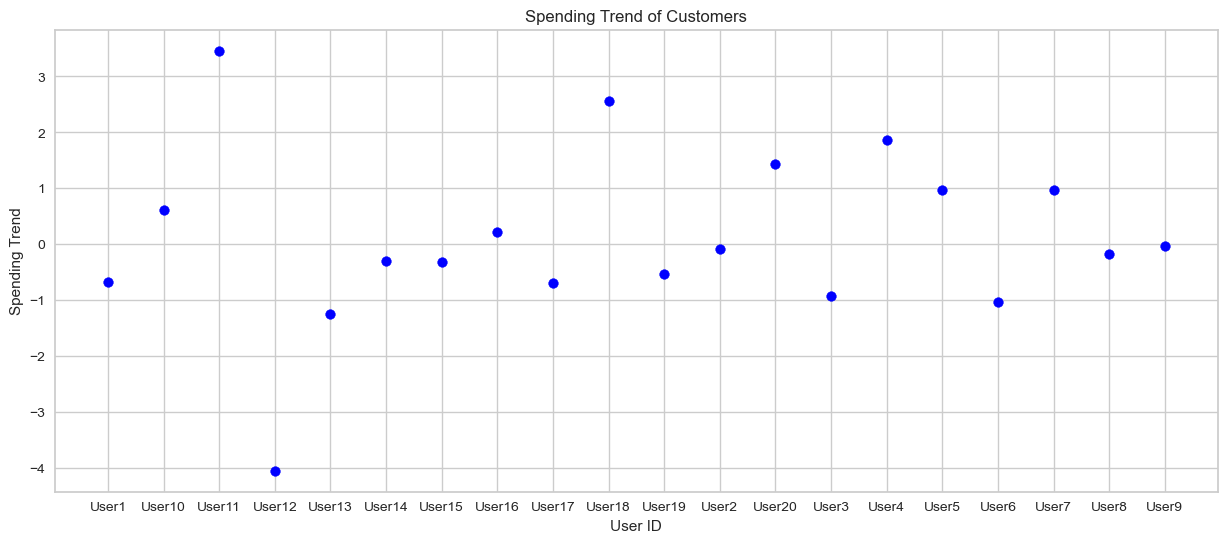

In [76]:
# Plotting the spending trend
plt.figure(figsize=(15, 6))
plt.scatter(customer_engagement['UserID'], customer_engagement['Spending_Trend'], color='blue')
plt.title('Spending Trend of Customers')
plt.xlabel('User ID')
plt.ylabel('Spending Trend')
plt.grid(True)
plt.show()

In [77]:
customer_engagement

UserID  Days_Since_Last_Purchase  Total Transactions  \
0    User1                         8                  20   
1   User10                        18                  29   
2   User11                         8                  26   
3   User12                         2                  17   
4   User13                        27                  35   
5   User14                        13                  31   
6   User15                         2                  30   
7   User16                         5                  21   
8   User17                         3                  23   
9   User18                         9                  19   
10  User19                         0                  22   
11   User2                        31                  26   
12  User20                         9                  30   
13   User3                         1                  30   
14   User4                        19                  24   
15   User5                        26                  23   
16   User6                         1                  23   
17   User7                         2                  22   
18   User8                         7                  26   
19   User9                        11                  22   

    Total Products Purchased  Total Products Searched  \
0                         20                       25   
1                         29                       27   
2                         26                       25   
3                         17                       19   
4                         35                       33   
5                         31                       21   
6                         30                       28   
7                         21                       23   
8                         23                       26   
9                         19                       24   
10                        22                       35   
11                        26                       31   
12                        30                       22   
13                        30                       30   
14                        24                       20   
15                        23                       20   
16                        23                       22   
17                        22                       18   
18                        26                       36   
19                        22                       30   

    Total Products in Wishlist  Total Products in Cart  \
0                           27                      25   
1                           26                      32   
2                           27                      30   
3                           22                      17   
4                           35                      38   
5                           22                      24   
6                           25                      29   
7                           28                      25   
8                           15                      23   
9                           23                      27   
10                          32                      31   
11                          26                      22   
12                          29                      23   
13                          27                      24   
14                          21                      20   
15                          19                      24   
16                          23                      26   
17                          23                      19   
18                          28                      33   
19                          28                      30   

    Total Products in Click History  Total Spend  Willing to Spend  ...  \
0                                27      5776.59          11456.50  ...   
1                                34      7441.41          10486.52  ...   
2                                25      5301.64          10131.83  ...   
3                         

In [78]:
customer_engagement.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   UserID                           20 non-null     object 
 1   Days_Since_Last_Purchase         20 non-null     int64  
 2   Total Transactions               20 non-null     int64  
 3   Total Products Purchased         20 non-null     int32  
 4   Total Products Searched          20 non-null     int32  
 5   Total Products in Wishlist       20 non-null     int32  
 6   Total Products in Cart           20 non-null     int32  
 7   Total Products in Click History  20 non-null     int32  
 8   Total Spend                      20 non-null     float64
 9   Willing to Spend                 20 non-null     float64
 10  Average Transaction Value        20 non-null     float64
 11  Unique Products Purchased        20 non-null     int64  
 12  Unique Products to be Pu

In [79]:
customer_engagement.describe().T

count         mean          std          min  \
Days_Since_Last_Purchase          20.0    10.100000     9.425051     0.000000   
Total Transactions                20.0    24.950000     4.650693    17.000000   
Total Products Purchased          20.0    24.950000     4.650693    17.000000   
Total Products Searched           20.0    25.750000     5.369259    18.000000   
Total Products in Wishlist        20.0    25.300000     4.508472    15.000000   
Total Products in Cart            20.0    26.100000     5.179921    17.000000   
Total Products in Click History   20.0    25.700000     5.232490    17.000000   
Total Spend                       20.0  6364.140000  1387.745692  4673.990000   
Willing to Spend                  20.0  9968.201000  1439.240817  7725.810000   
Average Transaction Value         20.0   255.018795    25.616406   203.909231   
Unique Products Purchased         20.0     9.100000     1.071153     6.000000   
Unique Products to be Purchased   20.0     9.850000     0.366348     9.000000   
Same_Age_or_Above                 20.0     0.300000     0.470162     0.000000   
Is_Male                           20.0     0.300000     0.470162     0.000000   
Buying_Same_Item                  20.0     0.300000     0.470162     0.000000   
From_Same_Location                20.0     0.050000     0.223607     0.000000   
Days_Between_Purchases            20.0     0.781139     4.139228    -5.725806   
Monthly_Spending_Mean             20.0  1060.402208   151.658603   812.149167   
Monthly_Spending_Std              20.0   588.425607   140.772095   347.307700   
Yearly_Spending_Mean              20.0  6362.413250   909.951619  4872.895000   
Yearly_Spending_Std               20.0  1250.719514   956.976961    80.560676   
Spending_Trend                    20.0     0.100081     1.582787    -4.053605   

                                         25%          50%           75%  \
Days_Since_Last_Purchase            2.000000     8.000000     14.250000   
Total Transactions                 22.000000    23.500000     29.250000   
Total Products Purchased           22.000000    23.500000     29.250000   
Total Products Searched            21.750000    25.000000     30.000000   
Total Products in Wishlist         22.750000    26.000000     28.000000   
Total Products in Cart             23.000000    25.000000     30.000000   
Total Products in Click History    22.000000    25.000000     27.000000   
Total Spend                      5272.852500  5787.170000   7504.875000   
Willing to Spend                 9230.247500  9858.310000  10726.007500   
Average Transaction Value         235.674563   253.851091    272.087779   
Unique Products Purchased           8.750000     9.000000     10.000000   
Unique Products to be Purchased    10.000000    10.000000     10.000000   
Same_Age_or_Above                   0.000000     0.000000      1.000000   
Is_Male                             0.000000     0.000000      1.000000   
Buying_Same_Item                    0.000000     0.000000      1.000000   
From_Same_Location                  0.000000     0.000000      0.000000   
Days_Between_Purchases             -1.760370     1.268462      3.370833   
Monthly_Spending_Mean             937.135000  1050.835417   1207.851667   
Monthly_Spending_Std              490.224047   585.510911    673.010893   
Yearly_Spending_Mean             5622.810000  6305.012500   7247.110000   
Yearly_Spending_Std               745.564551   937.581165   1519.116389   
Spending_Trend                     -0.688861    -0.133513      0.975272   

                                          max  
Days_Since_Last_Purchase            31.000000  
Total Transactions                  35.000000  
Total Products Purchased            35.000000  
Total Products Searched             36.000000  
Total Products in Wishlist          35.000000  
Total Products in Cart              38.000000  
Total Products in Click History     40.000000  
Total Spend                       9396.110000  
Willing to 

In [80]:
df

UserID  Age  Gender   Location   Item Name                         Brand  \
0    User14   40  Female     Russia       Watch                 Henry-Johnson   
1     User8   50    Male     Russia     T-Shirt                 Lawson-Tucker   
2     User2   59    Male      India  Headphones                     Gomez LLC   
3     User6   48  Female  Argentina     T-Shirt                 Morris-Miller   
4     User5   49  Female  Singapore         Bag                   Waters-Hall   
..      ...  ...     ...        ...         ...                           ...   
995   User3   25    Male    Belgium       Watch  Jimenez, Noble and Nicholson   
996  User19   42    Male         UK       Shoes              Jenkins-Williams   
997   User7   42  Female  Singapore     T-Shirt   Leonard, Phillips and Scott   
998  User11   56    Male      Japan     Perfume                Coleman-Savage   
999   User1   52  Female      India         Bag               Wright-Richards   

      Price  Rating  Number of Reviews  Purchase History  Search History  \
0    205.90     2.8                624                 1               0   
1    132.02     3.1                794                 0               0   
2    384.34     1.4                619                 0               0   
3    341.77     3.0                336                 1               1   
4    309.58     3.6                973                 1               1   
..      ...     ...                ...               ...             ...   
995  372.24     4.7                320                 0               1   
996   27.06     4.1                239                 0               1   
997  148.12     3.5                449                 0               0   
998  481.67     3.6                419                 0               1   
999  427.96     1.9                 25                 1               0   

     Wishlist  Cart Items  Click History  Transaction No. Transaction Date  \
0           0           0              0                1       2023-07-08   
1           0           1              1                0       2023-03-14   
2           0           0              0                0       2022-10-17   
3           1           0              1                4       2022-04-02   
4           1           0              0                5       2022-01-29   
..        ...         ...            ...              ...              ...   
995         1           0              0                0       2022-11-02   
996         0           0              0                0       2023-09-08   
997         0           1              0                0       2023-01-11   
998         1           1              1                0       2022-07-02   
999         0           0              1             1000       2023-01-20   

    Transaction Day  Month  Year  
0        2023-07-08      7  2023  
1        2023-03-14      3  2023  
2        2022-10-17     10  2022  
3        2022-04-02      4  2022  
4        2022-01-29      1  2022  
..              ...    ...   ...  
995      2022-11-02     11  2022  
996      2023-09-08      9  2023  
997      2023-01-11      1  2023  
998      2022-07-02      7  2022  
999      2023-01-20      1  2023  

[1000 rows x 19 columns]

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   UserID             1000 non-null   object        
 1   Age                1000 non-null   int64         
 2   Gender             1000 non-null   object        
 3   Location           1000 non-null   object        
 4   Item Name          1000 non-null   object        
 5   Brand              1000 non-null   object        
 6   Price              1000 non-null   float64       
 7   Rating             1000 non-null   float64       
 8   Number of Reviews  1000 non-null   int64         
 9   Purchase History   1000 non-null   int32         
 10  Search History     1000 non-null   int32         
 11  Wishlist           1000 non-null   int32         
 12  Cart Items         1000 non-null   int32         
 13  Click History      1000 non-null   int32         
 14  Transacti

Now the Feature Engineering process is completed. Variety of new features focussing on the customers have been created which will give a deeper understanding of their buying patterns and preferences. 

Now the next step is checking and handling outliers and preparing our data for clustering.

# Outlier Detection and Treatment

Outliers are data points that deviate significantly from the majority of other observations in the dataset. They have the potential to distort the outcomes of our analysis, particularly in techniques like k-means clustering, where they can heavily influence the positioning of cluster centroids. Therefore, it's crucial to appropriately identify and handle these outliers to attain more precise and meaningful clustering results.

Visually Detecting Outliers through Box Plots

Interpreting Outliers:

Lower Boundary: Q1 - 1.5 × IQR

Upper Boundary: Q3 + 1.5 × IQR

where, Q1 is First Quartile

Q3 is third quartile

Interquartile range (IQR) is range btw Q1 to Q2 (which includes median)

minimum: 17.000000

Q1(25%): 22.000000

Median(50%): 25.000000

Q3(75%): 27.000000

maximum: 40.000000

Calculating boundaries:

IQR = Q3 - Q1 = 27.0 - 22.0 = 5.0

Lower Boundary: Q1 - 1.5 × IQR = 22.0 - 1.5 × 5.0 = 14.5

Upper Boundary: Q3 + 1.5 × IQR = 27.0 - 1.5 × 5.0 = 19.5

Observations with values 17.0 is labelled as inlier & 40.0 is labeled as outlier.

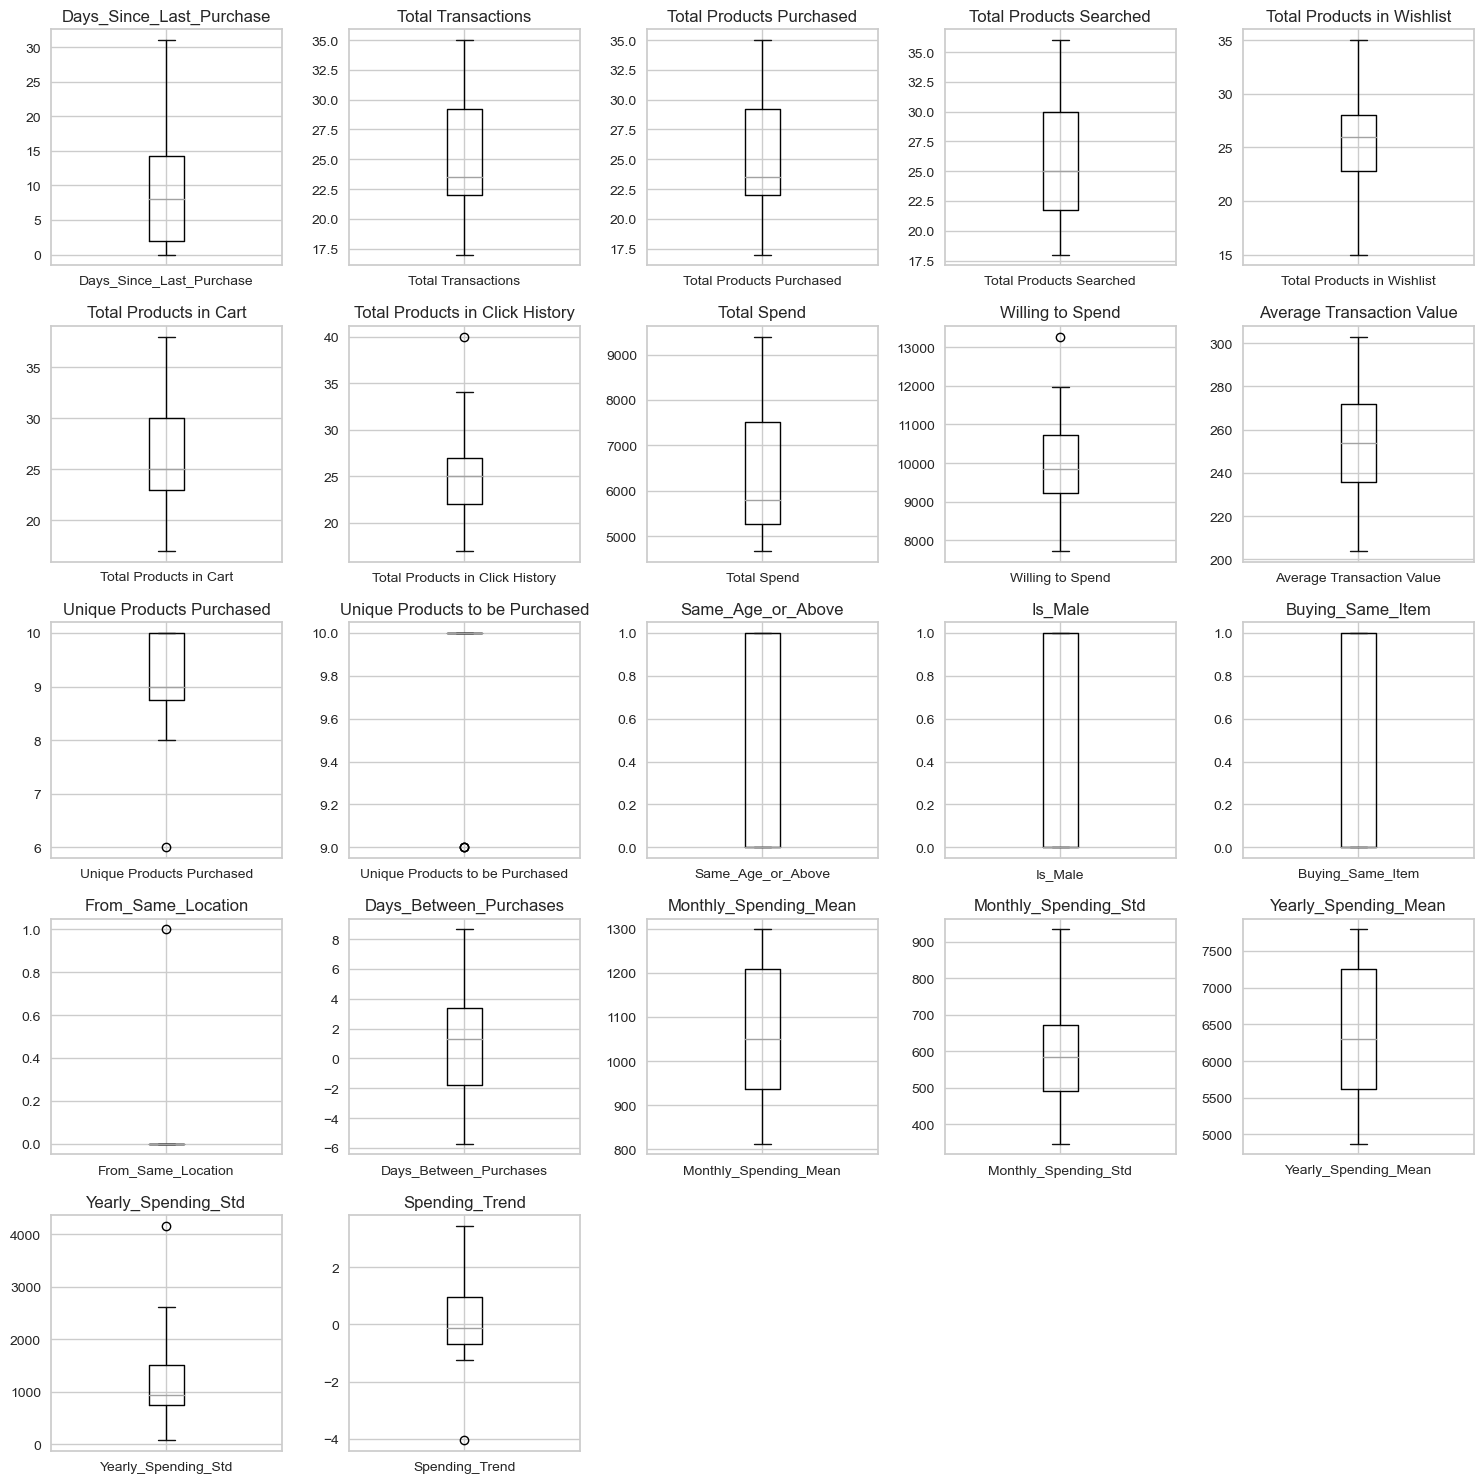

In [82]:
# Plotting box plots for each feature
plt.figure(figsize=(15, 15))
for i, column in enumerate(customer_engagement.columns[1:], 1):
    plt.subplot(5, 5, i)
    customer_engagement.boxplot(column=column)
    plt.title(column)

plt.tight_layout()
plt.show()

The Isolation Forest algorithm is a powerful tool for detecting and managing outliers, especially in scenarios like customer segmentation using K-means clustering.

Unsupervised Approach: In customer segmentation, where we often lack labeled data, this unsupervised approach is advantageous.

Fast and Scalable: Isolation Forests are built using binary trees. Each tree (called an Isolation Tree) processes a random subset of the data.

“Few and Different” Principle: The underlying idea is that anomalies are both “few” (fewer in number) and “different” (distinct from the majority). Isolation Forest leverages this principle, data points that require more splits to isolate them (travel deeper into the tree) are less likely to be anomalies. Conversely, points ending up in shorter branches are more likely to be anomalies.

No Assumptions About Data Distribution: It works well even when the data is irregularly distributed or contains complex patterns. In customer segmentation, where customer behavior can vary significantly, this flexibility is crucial.

Direct Anomaly Detection: The Isolation Forest algorithm directly quantifies how far a data point is from the rest of the data. It doesn’t rely on distance metrics or similarity scores.

In [83]:
# Initializing the IsolationForest model with a contamination parameter of 0.05
model = IsolationForest(contamination=0.05, random_state=0)

# Fitting the model on our dataset (converting DataFrame to NumPy to avoid warning)
customer_engagement['Outlier_Scores'] = model.fit_predict(customer_engagement.iloc[:, 1:].to_numpy())

# Creating a new column to identify outliers (1 for inliers and -1 for outliers)
customer_engagement['Is_Outlier'] = [1 if x == -1 else 0 for x in customer_engagement['Outlier_Scores']]

In [84]:
customer_engagement

UserID  Days_Since_Last_Purchase  Total Transactions  \
0    User1                         8                  20   
1   User10                        18                  29   
2   User11                         8                  26   
3   User12                         2                  17   
4   User13                        27                  35   
5   User14                        13                  31   
6   User15                         2                  30   
7   User16                         5                  21   
8   User17                         3                  23   
9   User18                         9                  19   
10  User19                         0                  22   
11   User2                        31                  26   
12  User20                         9                  30   
13   User3                         1                  30   
14   User4                        19                  24   
15   User5                        26                  23   
16   User6                         1                  23   
17   User7                         2                  22   
18   User8                         7                  26   
19   User9                        11                  22   

    Total Products Purchased  Total Products Searched  \
0                         20                       25   
1                         29                       27   
2                         26                       25   
3                         17                       19   
4                         35                       33   
5                         31                       21   
6                         30                       28   
7                         21                       23   
8                         23                       26   
9                         19                       24   
10                        22                       35   
11                        26                       31   
12                        30                       22   
13                        30                       30   
14                        24                       20   
15                        23                       20   
16                        23                       22   
17                        22                       18   
18                        26                       36   
19                        22                       30   

    Total Products in Wishlist  Total Products in Cart  \
0                           27                      25   
1                           26                      32   
2                           27                      30   
3                           22                      17   
4                           35                      38   
5                           22                      24   
6                           25                      29   
7                           28                      25   
8                           15                      23   
9                           23                      27   
10                          32                      31   
11                          26                      22   
12                          29                      23   
13                          27                      24   
14                          21                      20   
15                          19                      24   
16                          23                      26   
17                          23                      19   
18                          28                      33   
19                          28                      30   

    Total Products in Click History  Total Spend  Willing to Spend  ...  \
0                                27      5776.59          11456.50  ...   
1                                34      7441.41          10486.52  ...   
2                                25      5301.64          10131.83  ...   
3                         

In [85]:
# Calculate the percentage of inliers and outliers
outlier_percentage = customer_engagement['Is_Outlier'].value_counts(normalize=True) * 100

In [86]:
outlier_percentage

0    95.0
1     5.0
Name: Is_Outlier, dtype: float64

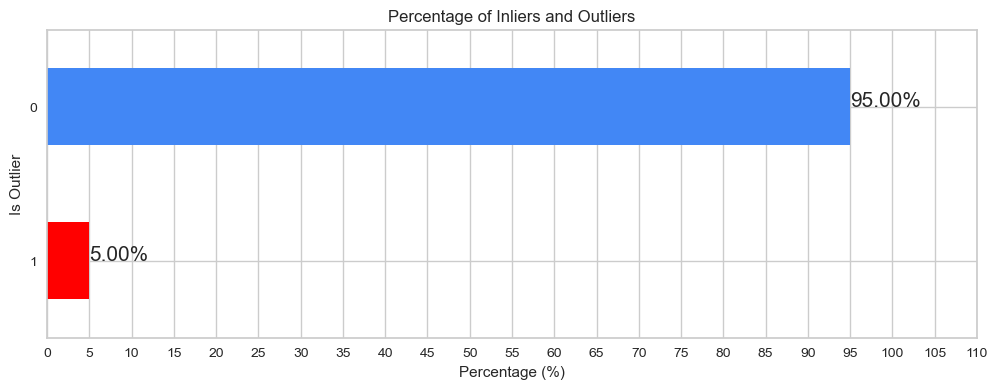

In [87]:
# Plotting the percentage of inliers and outliers
plt.figure(figsize=(12, 4))
outlier_percentage.plot(kind='barh', color=['#4287f5', '#ff0000'])

# Adding the percentage labels on the bars
for index, value in enumerate(outlier_percentage):
    plt.text(value, index, f'{value:.2f}%', fontsize=15)

plt.title('Percentage of Inliers and Outliers')
plt.xticks(ticks=np.arange(0, 115, 5))
plt.xlabel('Percentage (%)')
plt.ylabel('Is Outlier')
plt.gca().invert_yaxis()
plt.show()

In [88]:
# Separate the outliers for analysis
outliers_data = customer_engagement[customer_engagement['Is_Outlier'] == 1]

# Remove the outliers from the main dataset
customer_engagement_cleaned = customer_engagement[customer_engagement['Is_Outlier'] == 0]

# Drop the 'Outlier_Scores' and 'Is_Outlier' columns
customer_engagement_cleaned = customer_engagement_cleaned.drop(columns=['Outlier_Scores', 'Is_Outlier'])

# Reset the index of the cleaned data
customer_engagement_cleaned.reset_index(drop=True, inplace=True)

In [89]:
# Getting the number of rows in the cleaned customer dataset
customer_engagement_cleaned.shape[0]

19

In [90]:
customer_engagement_cleaned

UserID  Days_Since_Last_Purchase  Total Transactions  \
0    User1                         8                  20   
1   User10                        18                  29   
2   User11                         8                  26   
3   User12                         2                  17   
4   User14                        13                  31   
5   User15                         2                  30   
6   User16                         5                  21   
7   User17                         3                  23   
8   User18                         9                  19   
9   User19                         0                  22   
10   User2                        31                  26   
11  User20                         9                  30   
12   User3                         1                  30   
13   User4                        19                  24   
14   User5                        26                  23   
15   User6                         1                  23   
16   User7                         2                  22   
17   User8                         7                  26   
18   User9                        11                  22   

    Total Products Purchased  Total Products Searched  \
0                         20                       25   
1                         29                       27   
2                         26                       25   
3                         17                       19   
4                         31                       21   
5                         30                       28   
6                         21                       23   
7                         23                       26   
8                         19                       24   
9                         22                       35   
10                        26                       31   
11                        30                       22   
12                        30                       30   
13                        24                       20   
14                        23                       20   
15                        23                       22   
16                        22                       18   
17                        26                       36   
18                        22                       30   

    Total Products in Wishlist  Total Products in Cart  \
0                           27                      25   
1                           26                      32   
2                           27                      30   
3                           22                      17   
4                           22                      24   
5                           25                      29   
6                           28                      25   
7                           15                      23   
8                           23                      27   
9                           32                      31   
10                          26                      22   
11                          29                      23   
12                          27                      24   
13                          21                      20   
14                          19                      24   
15                          23                      26   
16                          23                      19   
17                          28                      33   
18                          28                      30   

    Total Products in Click History  Total Spend  Willing to Spend  ...  \
0                                27      5776.59          11456.50  ...   
1                                34      7441.41          10486.52  ...   
2                                25      5301.64          10131.83  ...   
3                                26      4673.99           7863.82  ...   
4                                25      9396.11           9997.53  ...   
5                                27      8396.60   

# Correlation Analysis

Correlation analysis helps identify which features are strongly related to each other. Multicollinearity occurs when two or more features are highly correlated. In K-means, multicollinearity can lead to biased cluster assignments. Reducing dimensionality simplifies the clustering process. Techniques like Principal Component Analysis (PCA) can be applied based on correlations.

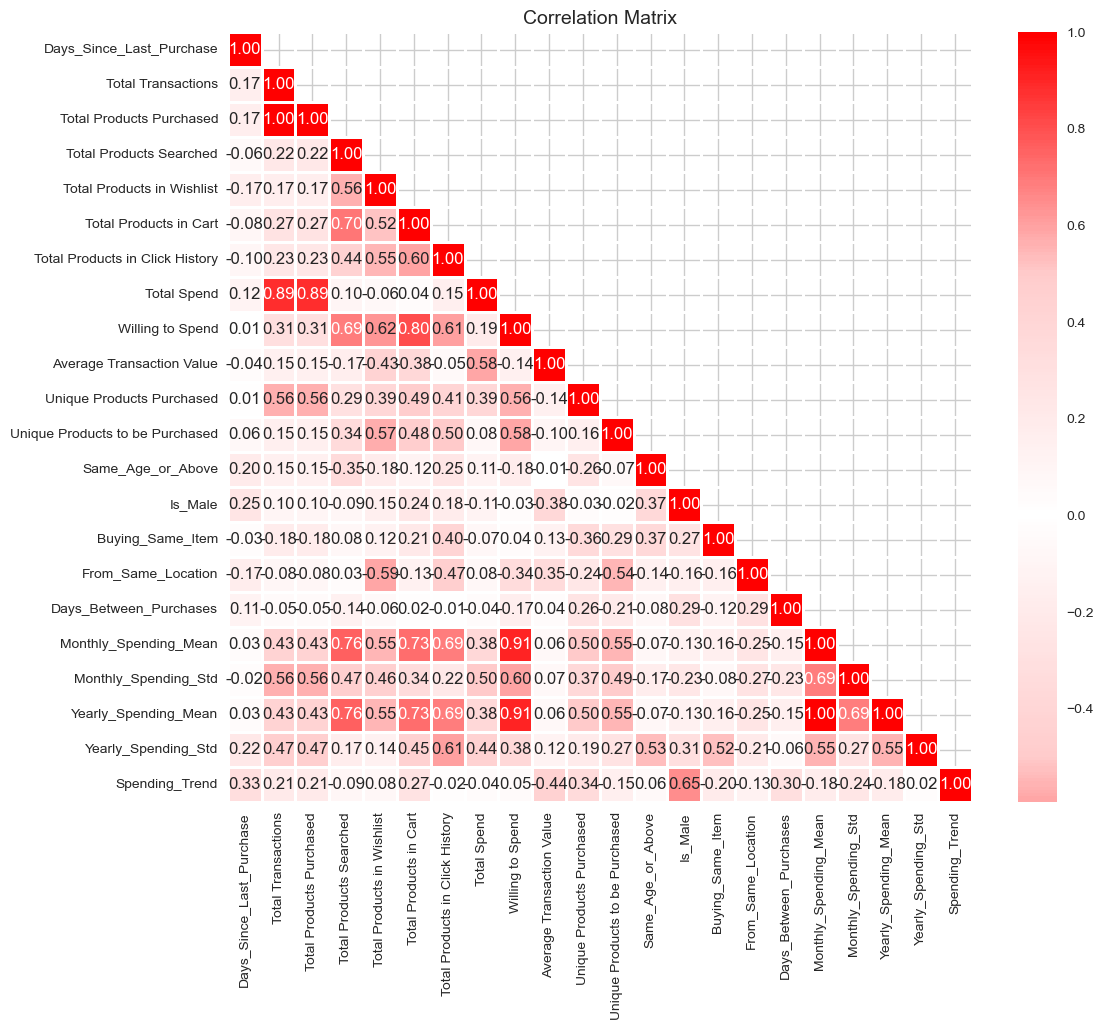

In [91]:
# Reset background style
sns.set_style('whitegrid')

# Calculate the correlation matrix excluding the 'UserID' column
corr = customer_engagement_cleaned.drop(columns=['UserID']).corr()

# Define a custom colormap
colors = ['#ff0000', '#ffcccc', 'white', '#ffcccc', '#ff0000']
my_cmap = LinearSegmentedColormap.from_list('custom_map', colors, N=256)

# Create a mask to only show the lower triangle of the matrix (since it's mirrored around its top-left to bottom-right diagonal)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, cmap=my_cmap, annot=True, center=0, fmt='.2f', linewidths=2)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

Color Coding:

Darker colors represent stronger correlations.

Lighter colors indicate weaker correlations.

Positive correlations (when one variable increases, the other tends to increase) are usually shown in warm colors.

Negative correlations (when one variable increases, the other tends to decrease) are usually shown in cool colors.

Pairs of variables that have high correlations:

Total Products Purschased & Total Transactions

Total Products in Cart & Total Products Searched

Total Spend & Total Transactions

Total Spend & Products Purschased

Willing to Spend & Total Products in Cart

Monthly_Spending_Mean & Total Products Searched

Monthly_Spending_Mean & Total Products in Cart

Monthly_Spending_Mean & Willing to Spend

Yearly_Spending_Mean & Total Products Searched

Yearly_Spending_Mean & Total Products in Cart

Yearly_Spending_Mean & Willing to Spend

Yearly_Spending_Mean & Monthly_Spending_Mean

Now to achive uncorrelated variables, have to apply PCA technique.

# Feature Scaling

K-Means Clustering:

K-means relies on distance calculations between data points. Scaling ensures that all features contribute equally to the algorithm.

Proper scaling prevents biased clusters based on feature magnitudes.

Scaling accelerates convergence by ensuring similar ranges for all features. Faster convergence leads to quicker model training.

Scaling makes the algorithm more stable across different datasets.

PCA (Principal Component Analysis):

PCA aims to find orthogonal axes (principal components) that capture maximum variance. Scaling ensures that features contribute equally to the principal components.

Scaled features allow meaningful interpretation of principal components.

Scaling ensures that eigenvalues reflect true variance proportions.

Scaling maintains a stable covariance matrix for accurate eigen decomposition.

In [92]:
# Initialize the StandardScaler
scaler = StandardScaler()

# List of columns that don't need to be scaled
columns_to_exclude = ['UserID', 'Unique Products Purchased', 'Unique Products to be Purchased', 'Same_Age_or_Above', 'Is_Male', 'Buying_Same_Item', 'From_Same_Location']

# List of columns that need to be scaled
columns_to_scale = customer_engagement_cleaned.columns.difference(columns_to_exclude)

# Copy the cleaned dataset
customer_engagement_scaled = customer_engagement_cleaned.copy()

# Applying the scaler to the necessary columns in the dataset
customer_engagement_scaled[columns_to_scale] = scaler.fit_transform(customer_engagement_scaled[columns_to_scale])

In [93]:
customer_engagement_scaled

UserID  Days_Since_Last_Purchase  Total Transactions  \
0    User1                 -0.141673           -1.104117   
1   User10                  1.028672            1.143550   
2   User11                 -0.141673            0.394327   
3   User12                 -0.843880           -1.853339   
4   User14                  0.443499            1.643031   
5   User15                 -0.843880            1.393290   
6   User16                 -0.492777           -0.854376   
7   User17                 -0.726846           -0.354895   
8   User18                 -0.024639           -1.353858   
9   User19                 -1.077949           -0.604635   
10   User2                  2.550120            0.394327   
11  User20                 -0.024639            1.393290   
12   User3                 -0.960915            1.393290   
13   User4                  1.145706           -0.105154   
14   User5                  1.964947           -0.354895   
15   User6                 -0.960915           -0.354895   
16   User7                 -0.843880           -0.604635   
17   User8                 -0.258708            0.394327   
18   User9                  0.209430           -0.604635   

    Total Products Purchased  Total Products Searched  \
0                  -1.104117                -0.072369   
1                   1.143550                 0.320492   
2                   0.394327                -0.072369   
3                  -1.853339                -1.250951   
4                   1.643031                -0.858090   
5                   1.393290                 0.516922   
6                  -0.854376                -0.465230   
7                  -0.354895                 0.124061   
8                  -1.353858                -0.268799   
9                  -0.604635                 1.891934   
10                  0.394327                 1.106213   
11                  1.393290                -0.661660   
12                  1.393290                 0.909782   
13                 -0.105154                -1.054521   
14                 -0.354895                -1.054521   
15                 -0.354895                -0.661660   
16                 -0.604635                -1.447381   
17                  0.394327                 2.088364   
18                 -0.604635                 0.909782   

    Total Products in Wishlist  Total Products in Cart  \
0                     0.568607               -0.108710   
1                     0.311380                1.497786   
2                     0.568607                1.038787   
3                    -0.717528               -1.944705   
4                    -0.717528               -0.338210   
5                     0.054153                0.809287   
6                     0.825834               -0.108710   
7                    -2.518116               -0.567709   
8                    -0.460301                0.350289   
9                     1.854741                1.268286   
10                    0.311380               -0.797208   
11                    1.083061               -0.567709   
12                    0.568607               -0.338210   
13                   -0.974755               -1.256207   
14                   -1.489208               -0.338210   
15                   -0.460301                0.120789   
16                   -0.460301               -1.485707   
17                    0.825834                1.727285   
18                    0.825834                1.038787   

    Total Products in Click History  Total Spend  Willing to Spend  ...  \
0                          0.512360    -0.374045          1.372914  ...   
1                          2.259640     0.881568          0.571790  ...   
2                          0.013137    -0.732254          0.278845  ...   
3                          0.262749    -1.205630         -1.594347  ...   
4                          0.013137     2.355809          0.167924  ...   
5                          0.512360     1.601975   

# Dimensionality Reduction

To remove multicollinear features issues.

PCA compresses the original features into a smaller set of principal components. These components capture most of the data’s variance. By retaining only a few components, we reduce storage requirements and computational complexity.

PCA focuses on the most informative dimensions, filtering out noise. Cleaner data leads to better clustering results.

Clusters become more distinct, as irrelevant features are removed. The reduced feature space enhances the algorithm’s efficiency.

PCA transforms data into a lower-dimensional space (e.g., 2D or 3D), allowing visualization.

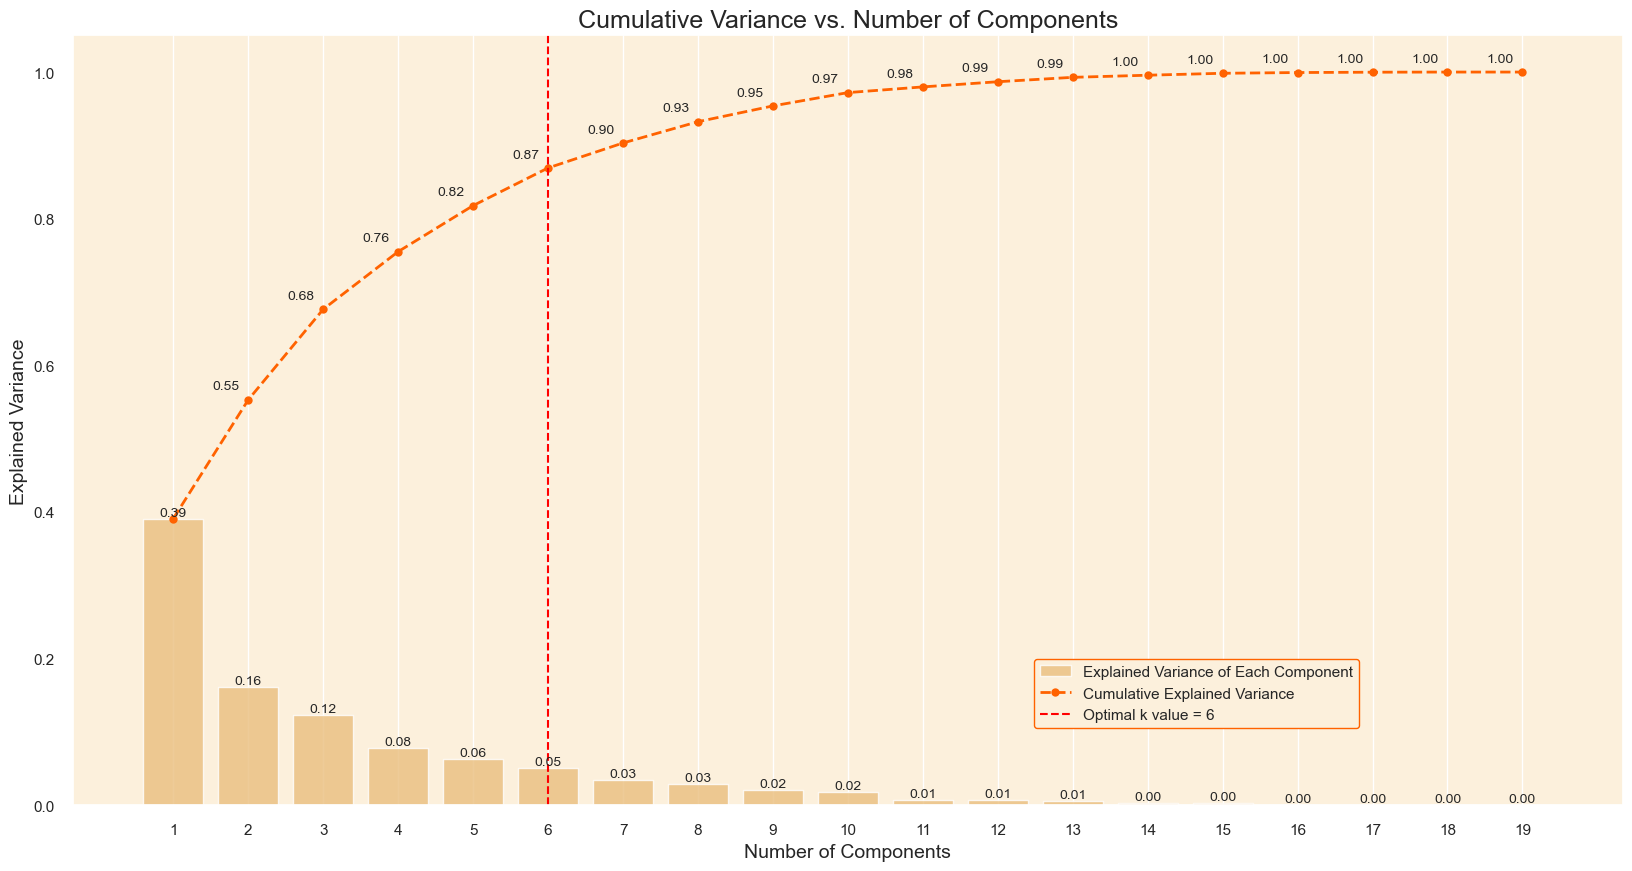

In [94]:
# Setting UserID as the index column
customer_engagement_scaled.set_index('UserID', inplace=True)

# Apply PCA
pca = PCA().fit(customer_engagement_scaled)

# Calculate the Cumulative Sum of the Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Set the optimal k value
optimal_k = 6

# Set seaborn plot style
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

# Plot the cumulative explained variance against the number of components
plt.figure(figsize=(20, 10))

# Bar chart for the explained variance of each component
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)), y=explained_variance_ratio, color='#fcc36d', alpha=0.8)

# Line plot for the cumulative explained variance
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance, marker='o', linestyle='--', color='#ff6200', linewidth=2)

# Plot optimal k value line
optimal_k_line = plt.axvline(optimal_k - 1, color='red', linestyle='--', label=f'Optimal k value = {optimal_k}') 

# Set labels and title
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# Customize ticks and legend
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot, optimal_k_line], labels=['Explained Variance of Each Component', 'Cumulative Explained Variance', f'Optimal k value = {optimal_k}'], loc=(0.62, 0.1), frameon=True, framealpha=1.0,   edgecolor='#ff6200')  

# Display the variance values for both graphs on the plots
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')   
plt.show()

When selecting the optimal number of components, we typically seek a point where adding another component no longer significantly boosts the cumulative explained variance, often termed as the "elbow point" in the curve.

From the plotted data, it's evident that the increase in cumulative variance begins to down after the 6th component, accounting for 87% of the total variance.

Considering the objective of customer segmentation, our aim is to retain adequate information to effectively identify distinct customer groups. Hence, retaining the first 6 components appears to strike a balance. These components collectively explain a substantial portion of the total variance while simultaneously reducing the dataset's dimensionality.

In [95]:
# Creating a PCA object with 6 components
pca = PCA(n_components=6)

# Fitting and transforming the original data to the new PCA dataframe
customer_engagement_pca = pca.fit_transform(customer_engagement_scaled)

# Creating a new dataframe from the PCA dataframe, with columns labeled PC1, PC2, etc.
customer_engagement_pca = pd.DataFrame(customer_engagement_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

# Adding the UserID index back to the new PCA dataframe
customer_engagement_pca.index = customer_engagement_scaled.index

In [96]:
customer_engagement_pca

PC1       PC2       PC3       PC4       PC5       PC6
UserID                                                            
User1   0.936563 -1.143190  0.910283 -0.009028  2.010212  1.250703
User10  4.083905  0.884282 -1.529844  3.223612  1.358676 -0.113040
User11  0.449232 -1.182670 -2.514097 -0.001027 -1.539772 -1.158315
User12 -4.361374 -0.856840  3.896517  1.770110 -0.579031 -1.073711
User14  1.513844  3.737479  1.196679  1.048500 -0.684657 -0.629263
User15  4.389574  1.534803  1.544999 -0.930572 -0.279368 -0.287863
User16 -1.653292 -1.770690 -0.667237 -1.033714  0.281043 -0.088000
User17 -3.555436  1.687557  0.776401 -0.507149  1.497421  0.931333
User18 -2.388122 -1.352195 -1.020745  1.467038  0.905118  0.044197
User19  2.777201 -3.054716  0.514527 -0.735451  0.937913 -0.113852
User2   0.529988  0.986667  0.545649 -0.362776 -1.723708  2.640775
User20  0.334986  1.792064 -1.835964 -1.354093  0.488958 -0.832498
User3   1.846067  1.609827  0.816904 -1.487781  0.274646 -0.924438
User4  -2.650367  0.879670 -1.954325  0.487366 -0.431188  0.229777
User5  -1.780206  0.592616 -1.448589  0.163298 -0.676998  1.370638
User6  -1.190682 -0.477178  0.430680 -1.438194  0.525688 -0.066020
User7  -3.839584  0.407699 -0.567468 -0.669786  0.034044 -1.241481
User8   3.924105 -2.071793  0.466635 -0.136173 -0.451456 -0.096538
User9   0.633596 -2.203393  0.438995  0.505821 -1.947541  0.157595

In [97]:
# Define a function to highlight the top 3 absolute values in each column of a dataframe
def top_3(column):
    top3 = column.abs().nlargest(3).index
    return ['background-color:  #ffeacc' if i in top3 else '' for i in column.index]

# Create the PCA component DataFrame and apply the highlighting function
pc_df = pd.DataFrame(pca.components_.T, columns=['PC{}'.format(i+1) for i in range(pca.n_components_)],  
                     index=customer_engagement_scaled.columns)

pc_df.style.apply(top_3, axis=0)

# K-Means Clustering

Determining the Optimal Number of Clusters:

Elbow Method

Concept:

The Elbow method evaluates the sum of squared distances (inertia) for different values of K (number of clusters).

It looks for the “elbow” point in the plot where the rate of decrease in inertia slows down.

How It Works:

Run K-means clustering for a range of K values.

Calculate the inertia (sum of squared distances) for each K.

Plot the inertia against K.

The “elbow” point indicates the optimal K.

Pros:

Simple and intuitive.

Provides a visual clue for choosing K.

Cons:

Ambiguous if the plot lacks a clear elbow point.

Doesn’t work well for non-convex clusters.

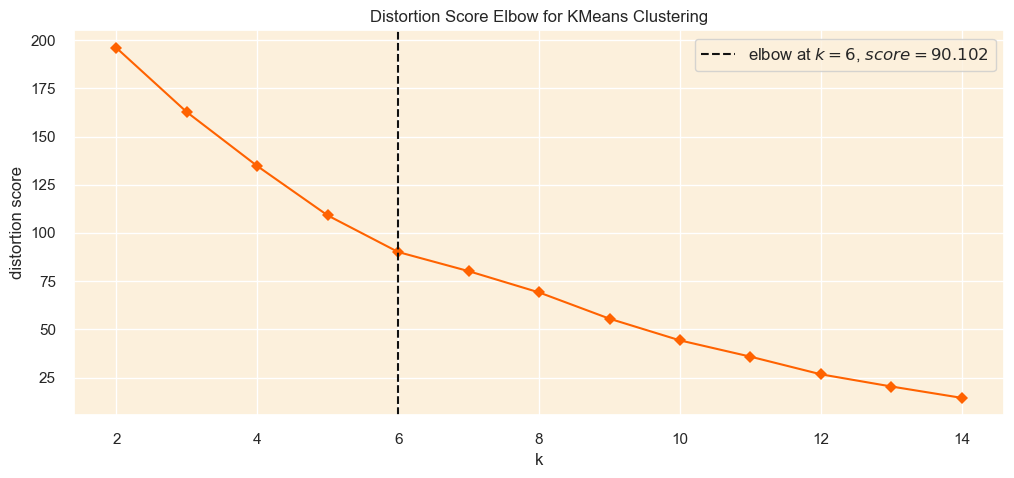

In [98]:
# Set plot style, and background color
sns.set(style='darkgrid', rc={'axes.facecolor': '#fcf0dc'})

# Set the color palette for the plot
sns.set_palette(['#ff6200'])

# Instantiate the clustering model with the specified parameters
km = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=0)

# Create a figure and axis with the desired size
fig, ax = plt.subplots(figsize=(12, 5))

# Instantiate the KElbowVisualizer with the model and range of k values, and disable the timing plot
visualizer = KElbowVisualizer(km, k=(2, 15), timings=False, ax=ax)

# Fit the data to the visualizer
visualizer.fit(customer_engagement_pca)

# Finalize and render the figure
visualizer.show();

Silhouette Method

Concept:

Silhouette analysis assesses the separation distance between resulting clusters.

Measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

How It Works:

Calculate the silhouette score for each data point.

Calculate a_i: Compute the average distance between point i and all other points within its cluster.

Calculate b_i: Compute the average distance between point i and all points in the nearest cluster to its own.

Now compute the silhouette score (s_i) = (b_i−a_i)/max(b_i,a_i)

Silhouette score ranges from -1 to 1:

Near +1: Sample is far from neighboring clusters.

0: Sample is on the decision boundary between clusters.

Negative: Sample might be assigned to the wrong cluster.

Choose the K value that maximizes the average silhouette score.

Pros:

Considers both cohesion and separation.

Works well for non-convex clusters.

Cons:

Computationally expensive for large datasets.

Choosing Between Them:

Silhouette Method is better than Elbow Method.

In [99]:
# Perform Silhouette analysis for a range of k values and visualize the results.
def silhouette_analysis(df, start_k, stop_k, figsize=(15, 16)):
    # Set the size of the figure
    plt.figure(figsize=figsize)

    # Create a grid with (stop_k - start_k + 1) rows and 2 columns
    grid = gridspec.GridSpec(stop_k - start_k + 1, 2)

    # Assign the first plot to the first row and both columns
    first_plot = plt.subplot(grid[0, :])

    # First plot: Silhouette scores for different k values
    sns.set_palette(['darkorange'])

    silhouette_scores = []

    # Iterate through the range of k values
    for k in range(start_k, stop_k + 1):
        km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=0)
        km.fit(df)
        labels = km.predict(df)
        score = silhouette_score(df, labels)
        silhouette_scores.append(score)

    best_k = start_k + silhouette_scores.index(max(silhouette_scores))

    plt.plot(range(start_k, stop_k + 1), silhouette_scores, marker='o')
    plt.xticks(range(start_k, stop_k + 1))
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette score')
    plt.title('Average Silhouette Score for Different k Values', fontsize=15)

    # Add the optimal k value text to the plot
    optimal_k_text = f'The k value with the highest Silhouette score is: {best_k}'
    plt.text(10, 0.23, optimal_k_text, fontsize=12, verticalalignment='bottom', horizontalalignment='left', bbox=dict(facecolor='#fcc36d', edgecolor='#ff6200', boxstyle='round, pad=0.5'))

    # Second plot (subplot): Silhouette plots for each k value
    colors = sns.color_palette("bright")

    for i in range(start_k, stop_k + 1):    
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=0)
        row_idx, col_idx = divmod(i - start_k, 2)

        # Assign the plots to the second, third, and fourth rows
        ax = plt.subplot(grid[row_idx + 1, col_idx])

        visualizer = SilhouetteVisualizer(km, colors=colors, ax=ax)
        visualizer.fit(df)

        # Add the Silhouette score text to the plot
        score = silhouette_score(df, km.labels_)
        ax.text(0.97, 0.02, f'Silhouette Score: {score:.2f}', fontsize=12, ha='right', transform=ax.transAxes, color='red')

        ax.set_title(f'Silhouette Plot for {i} Clusters', fontsize=15)

    plt.tight_layout()
    plt.show()

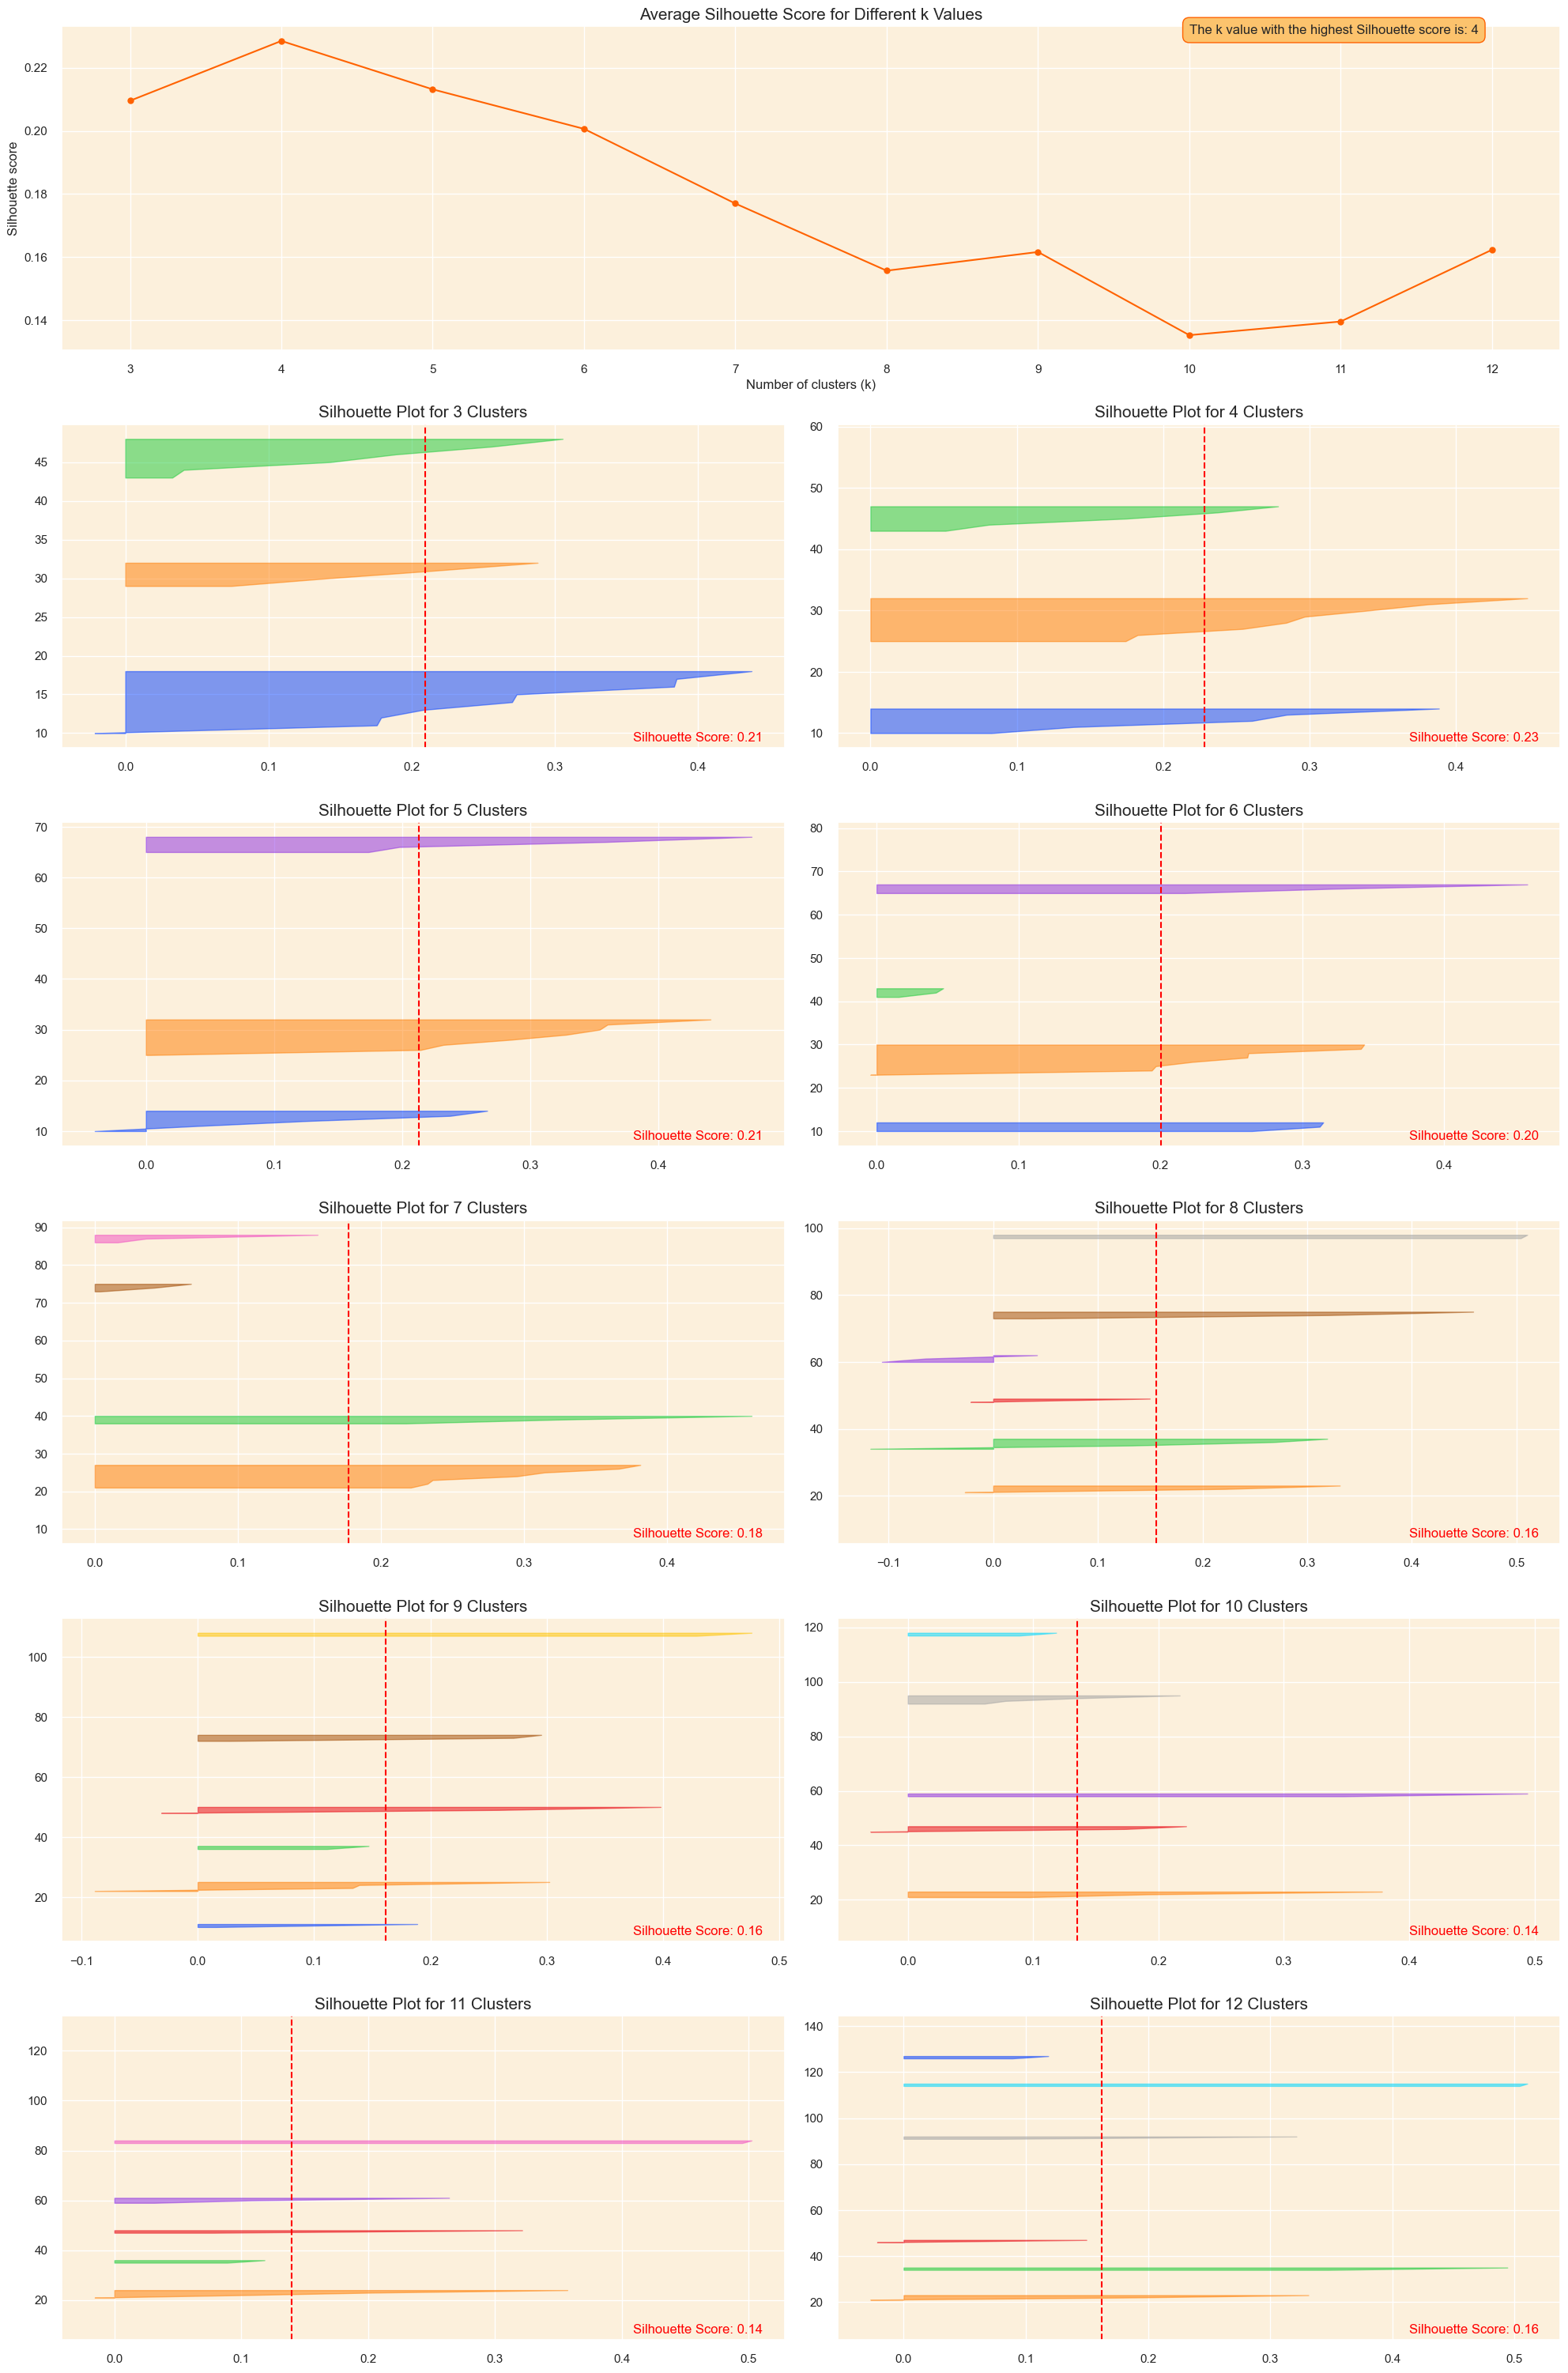

In [100]:
silhouette_analysis(customer_engagement_pca, 3, 12, figsize=(20, 50))

To interpret silhouette plots and determine the optimal number of clusters (k), the following criteria are considered:

1. Silhouette Plot Analysis:

Silhouette Score Width:

Wide Widths (closer to +1): Indicate well-separated clusters, with data points distinct from other clusters.

Narrow Widths (closer to -1): Suggest poorly defined clusters, where data points are not distinctly separated.

Average Silhouette Score:

High Average Width: Reflects well-separated clusters.

Low Average Width: Indicates poor separation between clusters.

2. Uniformity in Cluster Size:

Cluster Thickness:

Uniform Thickness: Suggests balanced clusters with a roughly equal number of data points.

Variable Thickness: Signifies an uneven distribution of data points across clusters.

3. Peaks in Average Silhouette Score:

Clear Peaks: Indicate potential optimal k values.

4. Minimize Fluctuations in Silhouette Plot Widths:

Uniform Widths: Prefer silhouette plots with consistent widths across clusters.

Variable Widths: Avoid fluctuations, suggesting poorly defined clusters.

5. Optimal Cluster Selection:

Maximize Overall Average Silhouette Score: Choose the k value with the highest average silhouette score across clusters.

Avoid Below-Average Scores: Ensure most clusters have above-average silhouette scores to maintain optimal clustering.

6. Visual Inspection of Silhouette Plots:

Consistent Cluster Formation: Visually examine silhouette plots for consistent and structured clusters.

Cluster Compactness: Look for compact clusters, with data points having silhouette scores closer to +1, indicating better clustering.

# Apply Clustering Model K-means:

K-Means Clustering:

K-means is an unsupervised learning algorithm used for clustering.

The “K” in K-means represents the number of predefined clusters we want to create.

The algorithm partitions data points into K clusters based on similarity.

Each cluster is associated with a centroid (a representative point).

The main idea is to minimize the distance between data points and their respective cluster centroids.

How K-Means Works:-

Initialization:

Choose the number of clusters (K).

Randomly initialize K centroids.

Assignment:

Assign each data point to the nearest centroid (cluster).

Calculate distances (usually Euclidean distance) between data points and centroids.

Update Centroids:

Recalculate the mean (centroid) for each cluster.

Move the centroids to the new mean positions.

Repeat Steps 2 and 3:

Iterate until the centroids no longer change significantly.

Final Clusters:

The resulting clusters represent distinct customer segments.

In [101]:
# Apply KMeans clustering using the optimal k
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(customer_engagement_pca)

# Get the frequency of each cluster
cluster_frequencies = Counter(kmeans.labels_)

# Create a mapping from old labels to new labels based on frequency
label_mapping = {label: new_label for new_label, (label, _) in enumerate(cluster_frequencies.most_common())}

# Reverse the mapping to assign labels as per your criteria
label_mapping = {v: k for k, v in {3: 2, 2: 1, 1: 0, 0: 3}.items()}

# Apply the mapping to get the new labels
new_labels = np.array([label_mapping[label] for label in kmeans.labels_])

# Append the new cluster labels back to the original dataset
customer_engagement_cleaned['cluster'] = new_labels

# Append the new cluster labels to the PCA version of the dataset
customer_engagement_pca['cluster'] = new_labels

In [102]:
customer_engagement_cleaned

UserID  Days_Since_Last_Purchase  Total Transactions  \
0    User1                         8                  20   
1   User10                        18                  29   
2   User11                         8                  26   
3   User12                         2                  17   
4   User14                        13                  31   
5   User15                         2                  30   
6   User16                         5                  21   
7   User17                         3                  23   
8   User18                         9                  19   
9   User19                         0                  22   
10   User2                        31                  26   
11  User20                         9                  30   
12   User3                         1                  30   
13   User4                        19                  24   
14   User5                        26                  23   
15   User6                         1                  23   
16   User7                         2                  22   
17   User8                         7                  26   
18   User9                        11                  22   

    Total Products Purchased  Total Products Searched  \
0                         20                       25   
1                         29                       27   
2                         26                       25   
3                         17                       19   
4                         31                       21   
5                         30                       28   
6                         21                       23   
7                         23                       26   
8                         19                       24   
9                         22                       35   
10                        26                       31   
11                        30                       22   
12                        30                       30   
13                        24                       20   
14                        23                       20   
15                        23                       22   
16                        22                       18   
17                        26                       36   
18                        22                       30   

    Total Products in Wishlist  Total Products in Cart  \
0                           27                      25   
1                           26                      32   
2                           27                      30   
3                           22                      17   
4                           22                      24   
5                           25                      29   
6                           28                      25   
7                           15                      23   
8                           23                      27   
9                           32                      31   
10                          26                      22   
11                          29                      23   
12                          27                      24   
13                          21                      20   
14                          19                      24   
15                          23                      26   
16                          23                      19   
17                          28                      33   
18                          28                      30   

    Total Products in Click History  Total Spend  Willing to Spend  ...  \
0                                27      5776.59          11456.50  ...   
1                                34      7441.41          10486.52  ...   
2                                25      5301.64          10131.83  ...   
3                                26      4673.99           7863.82  ...   
4                                25      9396.11           9997.53  ...   
5                                27      8396.60   

In [103]:
customer_engagement_pca

PC1       PC2       PC3       PC4       PC5       PC6  cluster
UserID                                                                     
User1   0.936563 -1.143190  0.910283 -0.009028  2.010212  1.250703        1
User10  4.083905  0.884282 -1.529844  3.223612  1.358676 -0.113040        0
User11  0.449232 -1.182670 -2.514097 -0.001027 -1.539772 -1.158315        1
User12 -4.361374 -0.856840  3.896517  1.770110 -0.579031 -1.073711        2
User14  1.513844  3.737479  1.196679  1.048500 -0.684657 -0.629263        3
User15  4.389574  1.534803  1.544999 -0.930572 -0.279368 -0.287863        3
User16 -1.653292 -1.770690 -0.667237 -1.033714  0.281043 -0.088000        2
User17 -3.555436  1.687557  0.776401 -0.507149  1.497421  0.931333        2
User18 -2.388122 -1.352195 -1.020745  1.467038  0.905118  0.044197        2
User19  2.777201 -3.054716  0.514527 -0.735451  0.937913 -0.113852        1
User2   0.529988  0.986667  0.545649 -0.362776 -1.723708  2.640775        3
User20  0.334986  1.792064 -1.835964 -1.354093  0.488958 -0.832498        3
User3   1.846067  1.609827  0.816904 -1.487781  0.274646 -0.924438        3
User4  -2.650367  0.879670 -1.954325  0.487366 -0.431188  0.229777        2
User5  -1.780206  0.592616 -1.448589  0.163298 -0.676998  1.370638        2
User6  -1.190682 -0.477178  0.430680 -1.438194  0.525688 -0.066020        2
User7  -3.839584  0.407699 -0.567468 -0.669786  0.034044 -1.241481        2
User8   3.924105 -2.071793  0.466635 -0.136173 -0.451456 -0.096538        1
User9   0.633596 -2.203393  0.438995  0.505821 -1.947541  0.157595        1

# Clustering Evaluation

3D Visualization of Top Principal Components

In [104]:
# Setting up the color scheme for the clusters (RGB order)
colors = ['#e8000b', '#1ac938', '#023eff', '#ff7c00']

# Create separate data frames for each cluster
cluster_0 = customer_engagement_pca[customer_engagement_pca['cluster'] == 0]
cluster_1 = customer_engagement_pca[customer_engagement_pca['cluster'] == 1]
cluster_2 = customer_engagement_pca[customer_engagement_pca['cluster'] == 2]
cluster_3 = customer_engagement_pca[customer_engagement_pca['cluster'] == 3]

# Create a 3D scatter plot
fig = go.Figure()

# Add data points for each cluster separately and specify the color
fig.add_trace(go.Scatter3d(x=cluster_0['PC1'], y=cluster_0['PC2'], z=cluster_0['PC3'], mode='markers', marker=dict(color=colors[0], size=5, opacity=0.4), name='Cluster 0'))
fig.add_trace(go.Scatter3d(x=cluster_1['PC1'], y=cluster_1['PC2'], z=cluster_1['PC3'], mode='markers', marker=dict(color=colors[1], size=5, opacity=0.4), name='Cluster 1'))
fig.add_trace(go.Scatter3d(x=cluster_2['PC1'], y=cluster_2['PC2'], z=cluster_2['PC3'], mode='markers', marker=dict(color=colors[2], size=5, opacity=0.4), name='Cluster 2'))
fig.add_trace(go.Scatter3d(x=cluster_3['PC1'], y=cluster_3['PC2'], z=cluster_3['PC3'], mode='markers', marker=dict(color=colors[3], size=5, opacity=0.4), name='Cluster 3'))

# Set the title and layout details
fig.update_layout(
    title=dict(text='3D Visualization of Customer Clusters in PCA Space with 4 Clusters', x=0.5),
    scene=dict(
        xaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC1'),
        yaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC2'),
        zaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC3'),
    ),
    width=900,
    height=800
)

# Show the plot
fig.show()

Cluster Distribution Visualization

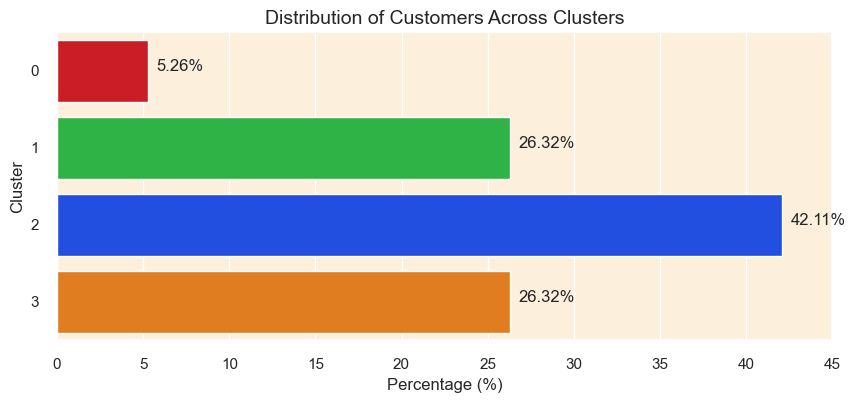

In [105]:
# Calculate the percentage of customers in each cluster
cluster_percentage = (customer_engagement_pca['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h', palette=colors)

# Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%')

plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Percentage (%)')

# Show the plot
plt.show()

Evaluation Metrics

Silhouette Score:

The Silhouette Score assesses the quality of clustering by comparing the similarity of data points within the same cluster to data points in different clusters.

Mathematical Formula:

For each data point i:

Calculate the average distance from i to other data points in the same cluster (a_i)

Calculate the average distance from i to data points in a different cluster (b_i)

Silhouette Score for data point i: (s_i) = (b_i−a_i)/max(b_i,a_i)

The overall Silhouette Score is the mean of all individual data point scores.

Interpretation:

Ranges from -1 (poor clustering) to +1 (perfect clustering).

A score close to 1 suggests well-separated clusters.

Davies-Bouldin Index:

The Davies-Bouldin Index evaluates the average similarity between each cluster and its most comparable cluster.

Mathematical Formula:

For each cluster i:

Calculate the dissimilarity between cluster i and the cluster most similar to i.

Davies-Bouldin Index (DB) is the average of these dissimilarities: DB = (1/n)∑max(j!=i)((a_i+a_j)/d(i,j))
 
n is the number of clusters.

a_i is a measure of dissimilarity between cluster i and its centroid.

d(i,j) is the distance between centroids of clusters i and j.

Interpretation:

Lower numbers suggest better clustering solutions.

Calinski-Harabasz Index (Variance Ratio Criterion):

The Calinski-Harabasz Index measures the ratio of between-cluster variance to within-cluster variance.

Mathematical Formula:

Calculate the sum of squares between clusters (B) and within clusters (W):

B = ∑n_i||C_i-C||^2

W = ∑∑||x-C_i||^2

Calinski-Harabasz Index (CH): CH = (B/W).(N-K)/(K-1)

K is the number of clusters.

N is the total number of data points.

Interpretation:

Higher numbers suggest better-defined clusters.

In [106]:
# Compute number of customers
num_observations = len(customer_engagement_pca)

# Separate the features and the cluster labels
X = customer_engagement_pca.drop('cluster', axis=1)
clusters = customer_engagement_pca['cluster']

# Compute the metrics
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Create a table to display the metrics and the number of observations
table_data = [
    ["Number of Observations", num_observations],
    ["Silhouette Score", sil_score],
    ["Calinski Harabasz Score", calinski_score],
    ["Davies Bouldin Score", davies_score]
]

# Print the table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+-------------------------+---------------------+
|         Metric          |        Value        |
+-------------------------+---------------------+
| Number of Observations  |         19          |
|    Silhouette Score     | 0.22845646386066745 |
| Calinski Harabasz Score |  5.980821108533767  |
|  Davies Bouldin Score   | 1.0689987453375518  |
+-------------------------+---------------------+


Silhouette Score: Fair

Calinski Harabasz Score: Resonable

Davies Bouldin Score: Resonable

# Cluster Analysis and Profiling

Radar Chart Approach


To create radar charts for visualizing the centroid values of each cluster across different features, we must initially calculate the centroid for each cluster. This centroid serves as the mean value for all features within a particular cluster. Afterward, we'll display these centroids on radar charts, enabling a straightforward visualization of the central tendencies of each feature across the clusters.

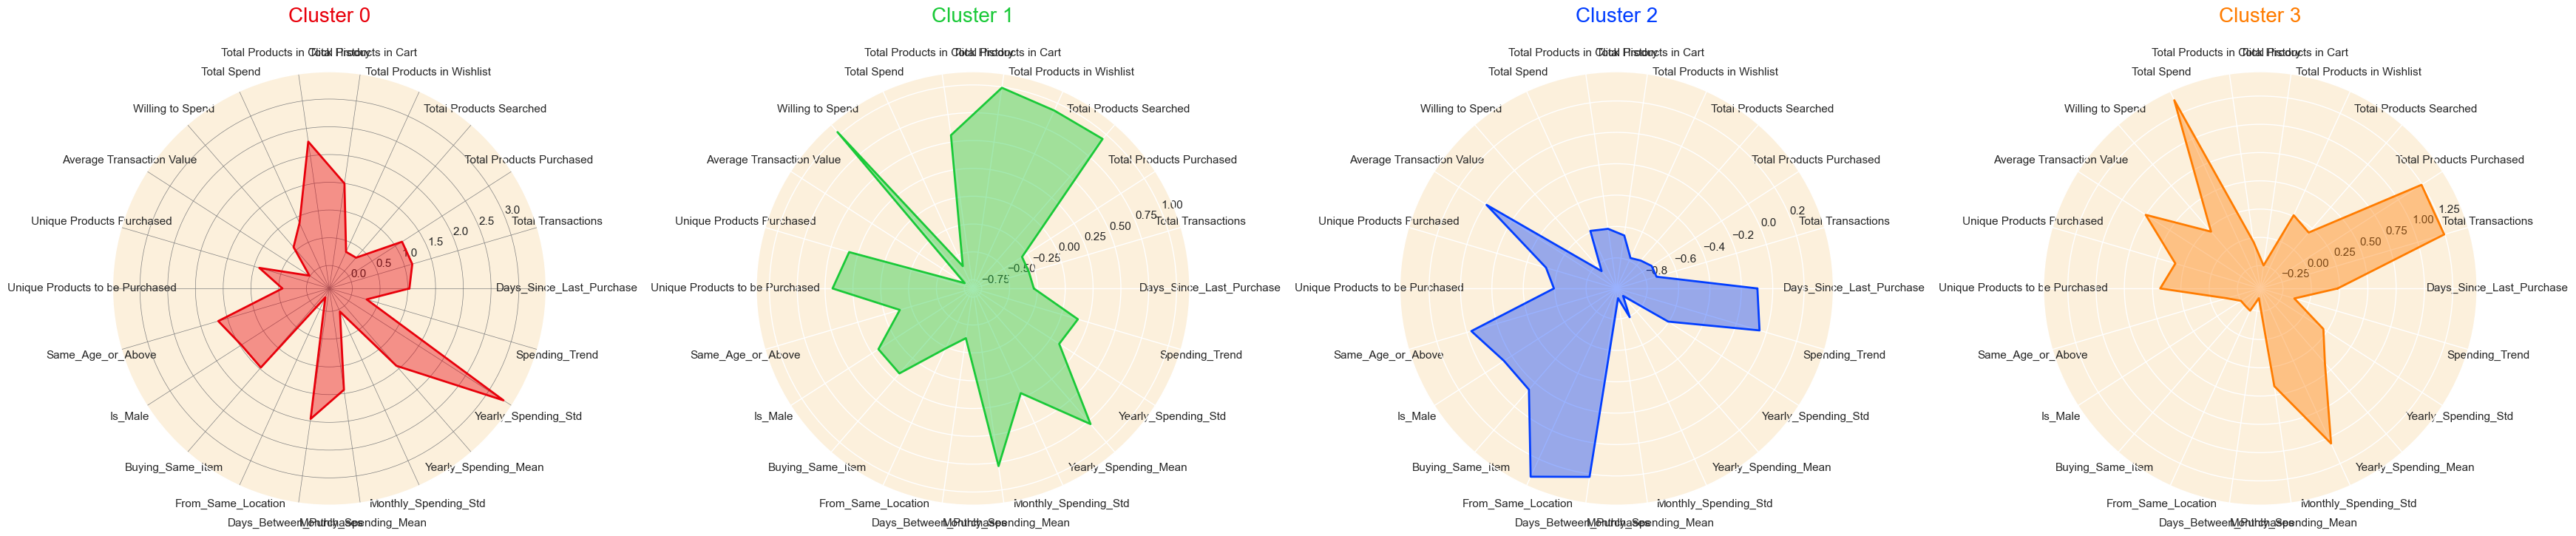

In [107]:
# Setting 'UserID' column as index and assigning it to a new dataframe
df_customer = customer_engagement_cleaned.set_index('UserID')

# Standardize the data (excluding the cluster column)
scaler = StandardScaler()
df_customer_standardized = scaler.fit_transform(df_customer.drop(columns=['cluster'], axis=1))

# Create a new dataframe with standardized values and add the cluster column back
df_customer_standardized = pd.DataFrame(df_customer_standardized, columns=df_customer.columns[:-1], index=df_customer.index)
df_customer_standardized['cluster'] = df_customer['cluster']

# Calculate the centroids of each cluster
cluster_centroids = df_customer_standardized.groupby('cluster').mean()

# Function to create a radar chart
def radar_chart(ax, angles, data, color, cluster):
    # Plot the data and fill the area
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
    
    # Add a title
    ax.set_title(f'Cluster {cluster}', size=20, color=color, y=1.1)

# Set data
labels=np.array(cluster_centroids.columns)
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start to the end
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Initialize the figure
fig, ax = plt.subplots(figsize=(35, 25), subplot_kw=dict(polar=True), nrows=1, ncols=4)

# Create radar chart for each cluster
for i, color in enumerate(colors):
    data = cluster_centroids.loc[i].tolist()
    data += data[:1]  # Complete the loop
    radar_chart(ax[i], angles, data, color, i)

# Add input data
ax[0].set_xticks(angles[:-1])
ax[0].set_xticklabels(labels[:-1])

ax[1].set_xticks(angles[:-1])
ax[1].set_xticklabels(labels[:-1])

ax[2].set_xticks(angles[:-1])
ax[2].set_xticklabels(labels[:-1])

ax[3].set_xticks(angles[:-1])
ax[3].set_xticklabels(labels[:-1])

# Add a grid
ax[0].grid(color='grey', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()

Histogram Chart Approach

We can validate the profiles identified from the radar charts by plotting histograms for each feature segmented by the cluster labels. These histograms provide a visual inspection of the distribution of feature values within each cluster, aiding in confirming or refining the profiles derived from the radar charts.

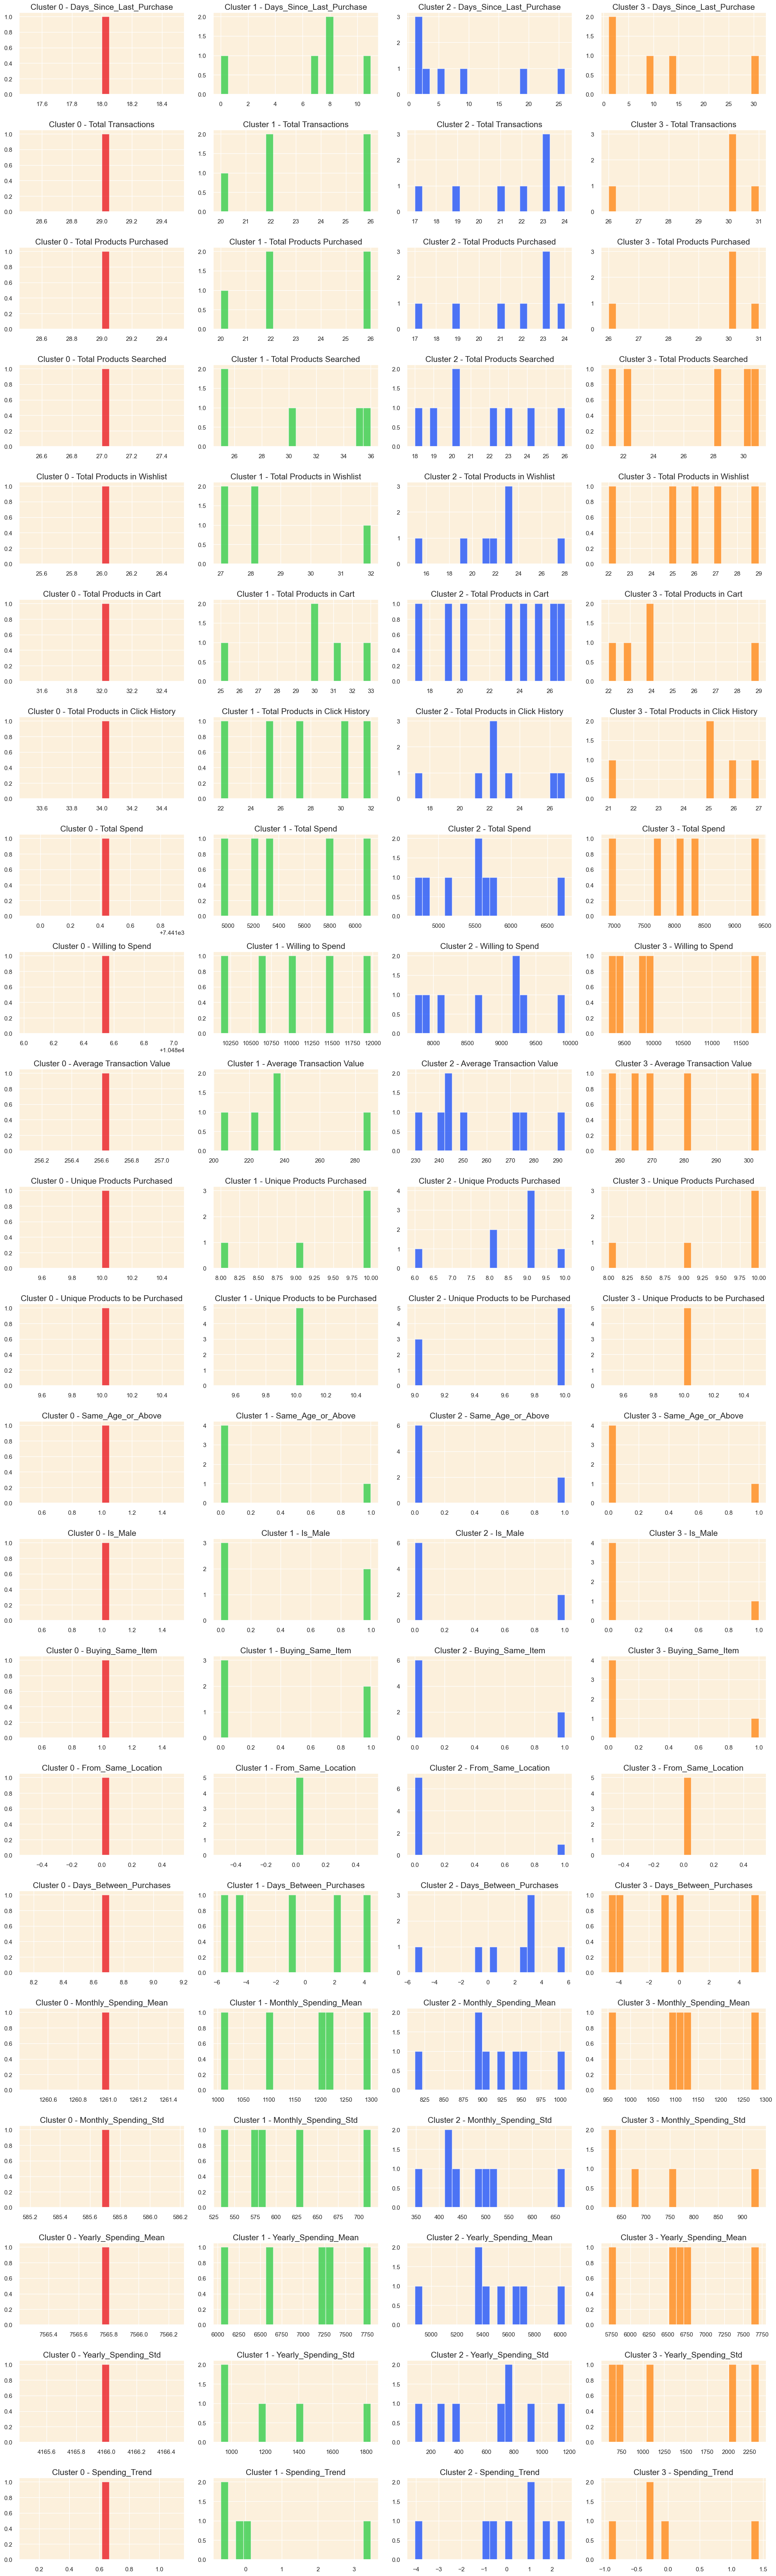

In [108]:
# Plot histograms for each feature segmented by the clusters
features = customer_engagement_cleaned.columns[1:-1]
clusters = customer_engagement_cleaned['cluster'].unique()
clusters.sort()

# Setting up the subplots
n_rows = len(features)
n_cols = len(clusters)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))

# Plotting histograms
for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        data = customer_engagement_cleaned[customer_engagement_cleaned['cluster'] == cluster][feature]
        axes[i, j].hist(data, bins=20, color=colors[j], edgecolor='w', alpha=0.7)
        axes[i, j].set_title(f'Cluster {cluster} - {feature}', fontsize=15)
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')

# Adjusting layout to prevent overlapping
plt.tight_layout()
plt.show()

In [109]:
#by seeing the plot we can say that cluster 2 is the best cluster

# Brand Recommendation Machine

Brand Recommendation Machine: If any customer search for an item name then this machine will predict top brand(s) for him/her.

In [110]:
def recommend_brand(item_name):
    # Filter dataset for the given item name
    filtered_data = df[df['Item Name'] == item_name]
    
    if filtered_data.empty:
        return "No recommendation available for this item."
    
    # Count the occurrences of each brand
    brand_counts = filtered_data['Brand'].value_counts()
    
    # Get the top-selling brand
    top_brand = brand_counts.idxmax()
    
    return f"Recommended brand(s) for {item_name}: {top_brand}"

# Main
item_to_search = input("Enter the item name: ")
recommendation = recommend_brand(item_to_search)
print(recommendation)

Enter the item name: Laptop
Recommended brand(s) for Laptop: Thompson Group
